In [1]:
import pandas as pd
import os

# 设置Excel文件所在的根目录
root_dir = r"D:\project\collection\data\qd"  # 替换为你的实际目录路径
# 例如: root_dir = r"D:\data\excel_files"

# 定义要读取的文件名列表
file_names = [
    "2010一手对应前催.xlsx", 
    "2406三手.xlsx", 
    "2406三手对应前催.xlsx",
    "2406二手.xlsx", 
    "2406二手对应前催.xlsx", 
    "2406四手.xlsx",
    "2406四手对应前催.xlsx", 
    "2410M3.xlsx", 
    "2410M3对应前催.xlsx",
    "2410一手.xlsx", 
    "2410五手M13-M24.xlsx", 
    "2410五手M13-M24对应前催.xlsx",
    "2410五手M25+.xlsx", 
    "2410五手M25+对应前催.xlsx", 
    "2410五手M7-M12.xlsx",
    "2410五手M7-M12对应前催.xlsx"
]

# 存储每个文件的列名
file_columns = {}

# 遍历所有文件并读取列名
for file_name in file_names:
    # 拼接完整的文件路径
    file_path = os.path.join(root_dir, file_name)
    
    try:
        # 检查文件是否存在
        if not os.path.exists(file_path):
            print(f"文件不存在: {file_path}")
            continue
            
        # 读取Excel文件的第一个工作表，只获取列名
        df = pd.read_excel(file_path, nrows=0)  # nrows=0表示只读取表头
        columns = df.columns.tolist()  # 将列名转换为列表
        file_columns[file_name] = columns
        print(f"成功读取 {file_name} 的列名")
    except Exception as e:
        print(f"读取 {file_name} 时出错: {str(e)}")

# 打印结果
print("\n各文件的列名如下：")
for file, cols in file_columns.items():
    print(f"\n{file}:")
    for i, col in enumerate(cols, 1):
        print(f"  {i}. {col}")

成功读取 2010一手对应前催.xlsx 的列名
成功读取 2406三手.xlsx 的列名
成功读取 2406三手对应前催.xlsx 的列名
成功读取 2406二手.xlsx 的列名
成功读取 2406二手对应前催.xlsx 的列名
成功读取 2406四手.xlsx 的列名
成功读取 2406四手对应前催.xlsx 的列名
成功读取 2410M3.xlsx 的列名
成功读取 2410M3对应前催.xlsx 的列名
成功读取 2410一手.xlsx 的列名
成功读取 2410五手M13-M24.xlsx 的列名
成功读取 2410五手M13-M24对应前催.xlsx 的列名
成功读取 2410五手M25+.xlsx 的列名
成功读取 2410五手M25+对应前催.xlsx 的列名
成功读取 2410五手M7-M12.xlsx 的列名
成功读取 2410五手M7-M12对应前催.xlsx 的列名

各文件的列名如下：

2010一手对应前催.xlsx:
  1. 客户
  2. 内部批次号
  3. 委外批次号
  4. 卡号
  5. 账号
  6. 委案金额
  7. 状态
  8. 状态代码
  9. 逾期时段
  10. 接单时间
  11. 最后跟进时间
  12. 当前(最后)业务员
  13. 当前(最后)业务员账号
  14. 案件所在部门
  15. 最新欠款
  16. 最新欠款日期
  17. 案件导入编号
  18. 开户日期
  19. 最后催记添加人
  20. 冻结状态
  21. 接单批次
  22. 批次批注
  23. 案件类型
  24. 卡类描述
  25. 省份
  26. 城市
  27. 委案机构
  28. 货币
  29. 收回金额
  30. 留案
  31. 减免
  32. 诉讼
  33. 备注1
  34. 备注2
  35. 备注3
  36. 备注4
  37. 备注5
  38. 备注6
  39. 备注7
  40. 备注8
  41. 标签
  42. 性别
  43. 佣金比例
  44. 折合人民币
  45. 汇率
  46. 银行利息
  47. 账单日
  48. 销售渠道
  49. 推广人员代码
  50. 主副卡
  51. 到案时最后刷卡日期
  52. 到案时最后提现日期
  53

In [2]:
import pandas as pd
import re
from collections import defaultdict
import json
import os

def analyze_column_features(file_name, columns):
    """
    分析Excel列名的特征
    
    参数:
    file_name: 文件名
    columns: 列名列表
    
    返回:
    分析结果字典
    """
    # 初始化分析结果字典
    analysis = {
        "file_name": file_name,
        "total_columns": len(columns),
        "category_counts": defaultdict(int),
        "keyword_analysis": defaultdict(list),
        "data_type_inference": {},
        "special_columns": [],
        "duplicate_check": {
            "has_duplicates": False,
            "duplicates": []
        }
    }
    
    # 定义列名分类规则
    category_patterns = {
        "客户信息": [r"客户", r"姓名", r"身份证", r"性别", r"省份", r"城市", r"职务", r"电话", r"编号"],
        "批次与案件标识": [r"批次", r"编号", r"案", r"合同", r"卡", r"账号", r"手次"],
        "财务数据": [r"金额", r"款", r"费", r"息", r"额度", r"本金", r"人民币", r"汇率", r"佣金"],
        "时间信息": [r"日期", r"时间", r"日", r"时"],
        "催收流程": [r"催收", r"跟进", r"接单", r"联系", r"承诺", r"措施", r"录音", r"操作员", r"业务员", r"部门"],
        "状态信息": [r"状态", r"逾期", r"过期", r"冻结", r"留案", r"减免", r"诉讼", r"结果", r"类型", r"场景", r"渠道"],
        "备注信息": [r"备注", r"标签", r"警告", r"批注"]
    }
    
    # 检查重复列名
    seen = set()
    duplicates = []
    for col in columns:
        if col in seen:
            duplicates.append(col)
        else:
            seen.add(col)
    if duplicates:
        analysis["duplicate_check"]["has_duplicates"] = True
        analysis["duplicate_check"]["duplicates"] = duplicates
    
    # 分析每个列名
    for col in columns:
        # 1. 分类统计
        categorized = False
        for category, patterns in category_patterns.items():
            for pattern in patterns:
                if re.search(pattern, col):
                    analysis["category_counts"][category] += 1
                    categorized = True
                    break
            if categorized:
                break
        if not categorized:
            analysis["category_counts"]["其他"] += 1
        
        # 2. 关键词提取
        words = re.findall(r"[\u4e00-\u9fa5a-zA-Z0-9]+", col)
        for word in words:
            if len(word) > 1:  # 只关注长度大于1的关键词
                analysis["keyword_analysis"][word].append(col)
        
        # 3. 推断数据类型
        if re.search(r"金额|款|费|息|额度|本金|汇率|佣金", col):
            analysis["data_type_inference"][col] = "数值型(金额)"
        elif re.search(r"日期|时间|日|时", col):
            analysis["data_type_inference"][col] = "日期时间型"
        elif re.search(r"身份证|电话|编号|账号|卡", col):
            analysis["data_type_inference"][col] = "字符串型(标识)"
        elif re.search(r"性别|状态|类型|结果|是否|渠道|场景|方式", col):
            analysis["data_type_inference"][col] = "类别型"
        else:
            analysis["data_type_inference"][col] = "不确定"
        
        # 4. 特殊列识别
        if re.search(r"备注\d+", col) or col in ["备注1", "备注2", "备注3", "备注4", "备注5", "备注6", "备注7", "备注8"]:
            analysis["special_columns"].append(f"{col}(多备注字段)")
        elif re.search(r"最后|最新|当前", col):
            analysis["special_columns"].append(f"{col}(含时间限定词)")
    
    # 整理关键词分析，按出现次数排序
    sorted_keywords = sorted(analysis["keyword_analysis"].items(), 
                            key=lambda x: len(x[1]), reverse=True)
    analysis["keyword_analysis"] = dict(sorted_keywords)
    
    return analysis

def generate_report(analysis_result, output_dir=None):
    """生成特征分析报告"""
    # 如果未指定输出目录，使用当前目录
    if output_dir is None:
        output_dir = os.getcwd()
    
    # 创建输出目录（如果不存在）
    os.makedirs(output_dir, exist_ok=True)
    
    # 文本报告
    report_text = f"文件: {analysis_result['file_name']}\n"
    report_text += f"总列数: {analysis_result['total_columns']}\n\n"
    
    report_text += "1. 列名分类统计:\n"
    for category, count in analysis_result['category_counts'].items():
        percentage = (count / analysis_result['total_columns']) * 100
        report_text += f"   {category}: {count}列 ({percentage:.1f}%)\n"
    
    report_text += "\n2. 重复列名检查:\n"
    if analysis_result['duplicate_check']['has_duplicates']:
        report_text += f"   发现重复列名: {', '.join(analysis_result['duplicate_check']['duplicates'])}\n"
    else:
        report_text += "   未发现重复列名\n"
    
    report_text += "\n3. 主要关键词分析 (出现次数):\n"
    for i, (keyword, cols) in enumerate(list(analysis_result['keyword_analysis'].items())[:10]):
        report_text += f"   {keyword}: 出现于{len(cols)}列 ({', '.join(cols[:3])}{'...' if len(cols)>3 else ''})\n"
    
    report_text += "\n4. 数据类型推断:\n"
    type_counts = defaultdict(int)
    for col_type in analysis_result['data_type_inference'].values():
        type_counts[col_type] += 1
    for type_name, count in type_counts.items():
        report_text += f"   {type_name}: {count}列\n"
    
    report_text += "\n5. 特殊列识别:\n"
    if analysis_result['special_columns']:
        for col in analysis_result['special_columns'][:10]:
            report_text += f"   {col}\n"
        if len(analysis_result['special_columns']) > 10:
            report_text += f"   ... 还有{len(analysis_result['special_columns'])-10}列\n"
    else:
        report_text += "   未识别到特殊列\n"
    
    # 保存文本报告
    text_report_path = os.path.join(output_dir, f"{os.path.splitext(analysis_result['file_name'])[0]}_特征分析报告.txt")
    with open(text_report_path, "w", encoding="utf-8") as f:
        f.write(report_text)
    
    # 保存JSON格式报告（便于后续处理）
    json_report_path = os.path.join(output_dir, f"{os.path.splitext(analysis_result['file_name'])[0]}_特征分析报告.json")
    with open(json_report_path, "w", encoding="utf-8") as f:
        json.dump(analysis_result, f, ensure_ascii=False, indent=2)
    
    print(f"分析报告已保存至:\n{text_report_path}\n{json_report_path}")
    
    return report_text

# 主函数
def main():
    # "2010一手对应前催.xlsx"的列名列表
    columns = [
        "客户", "内部批次号", "委外批次号", "卡号", "账号", "委案金额", "状态", 
        "状态代码", "逾期时段", "接单时间", "最后跟进时间", "当前(最后)业务员", 
        "当前(最后)业务员账号", "案件所在部门", "最新欠款", "最新欠款日期", 
        "案件导入编号", "开户日期", "最后催记添加人", "冻结状态", "接单批次", 
        "批次批注", "案件类型", "卡类描述", "省份", "城市", "委案机构", "货币", 
        "收回金额", "留案", "减免", "诉讼", "备注1", "备注2", "备注3", "备注4", 
        "备注5", "备注6", "备注7", "备注8", "标签", "性别", "佣金比例", "折合人民币", 
        "汇率", "银行利息", "账单日", "销售渠道", "推广人员代码", "主副卡", 
        "到案时最后刷卡日期", "到案时最后提现日期", "手次", "额度", "入催日期", 
        "本金", "欠款滞纳金", "年费", "超限费", "其它费", "到案时最后还款日期", 
        "到案时最后还款额", "职务", "过期天数", "添加时间", "措施(仅内容)", "录音Id", 
        "仅录音", "进展类型", "对象姓名", "关系", "操作员", "操作员账号", "警告信息", 
        "电话类型", "厂商英文简称", "身份证", "债务人姓名", "日期", "时间", "催收方式", 
        "催收渠道", "催收结果", "催收场景", "电话号码", "措施", "备注措施", "客户分行", 
        "催收类型", "是否可联", "承诺还款日期", "承诺还款金额", "下次跟进时间", 
        "联系类型", "联系结果", "客户编号", "合同编号"
    ]
    
    # 分析列名特征
    analysis_result = analyze_column_features("2010一手对应前催.xlsx", columns)
    
    # 生成并打印报告
    report = generate_report(analysis_result)
    print("\n特征分析报告:\n")
    print(report)

if __name__ == "__main__":
    main()
    

分析报告已保存至:
C:\Users\HITSZ\2010一手对应前催_特征分析报告.txt
C:\Users\HITSZ\2010一手对应前催_特征分析报告.json

特征分析报告:

文件: 2010一手对应前催.xlsx
总列数: 97

1. 列名分类统计:
   客户信息: 14列 (14.4%)
   批次与案件标识: 20列 (20.6%)
   状态信息: 8列 (8.2%)
   时间信息: 10列 (10.3%)
   催收流程: 14列 (14.4%)
   财务数据: 16列 (16.5%)
   其他: 6列 (6.2%)
   备注信息: 9列 (9.3%)

2. 重复列名检查:
   未发现重复列名

3. 主要关键词分析 (出现次数):
   当前: 出现于2列 (当前(最后)业务员, 当前(最后)业务员账号)
   最后: 出现于2列 (当前(最后)业务员, 当前(最后)业务员账号)
   措施: 出现于2列 (措施(仅内容), 措施)
   客户: 出现于1列 (客户)
   内部批次号: 出现于1列 (内部批次号)
   委外批次号: 出现于1列 (委外批次号)
   卡号: 出现于1列 (卡号)
   账号: 出现于1列 (账号)
   委案金额: 出现于1列 (委案金额)
   状态: 出现于1列 (状态)

4. 数据类型推断:
   不确定: 40列
   字符串型(标识): 12列
   数值型(金额): 18列
   类别型: 15列
   日期时间型: 12列

5. 特殊列识别:
   最后跟进时间(含时间限定词)
   当前(最后)业务员(含时间限定词)
   当前(最后)业务员账号(含时间限定词)
   最新欠款(含时间限定词)
   最新欠款日期(含时间限定词)
   最后催记添加人(含时间限定词)
   备注1(多备注字段)
   备注2(多备注字段)
   备注3(多备注字段)
   备注4(多备注字段)
   ... 还有8列



成功加载数据：16161条记录，97列
开始升成可视化报告...


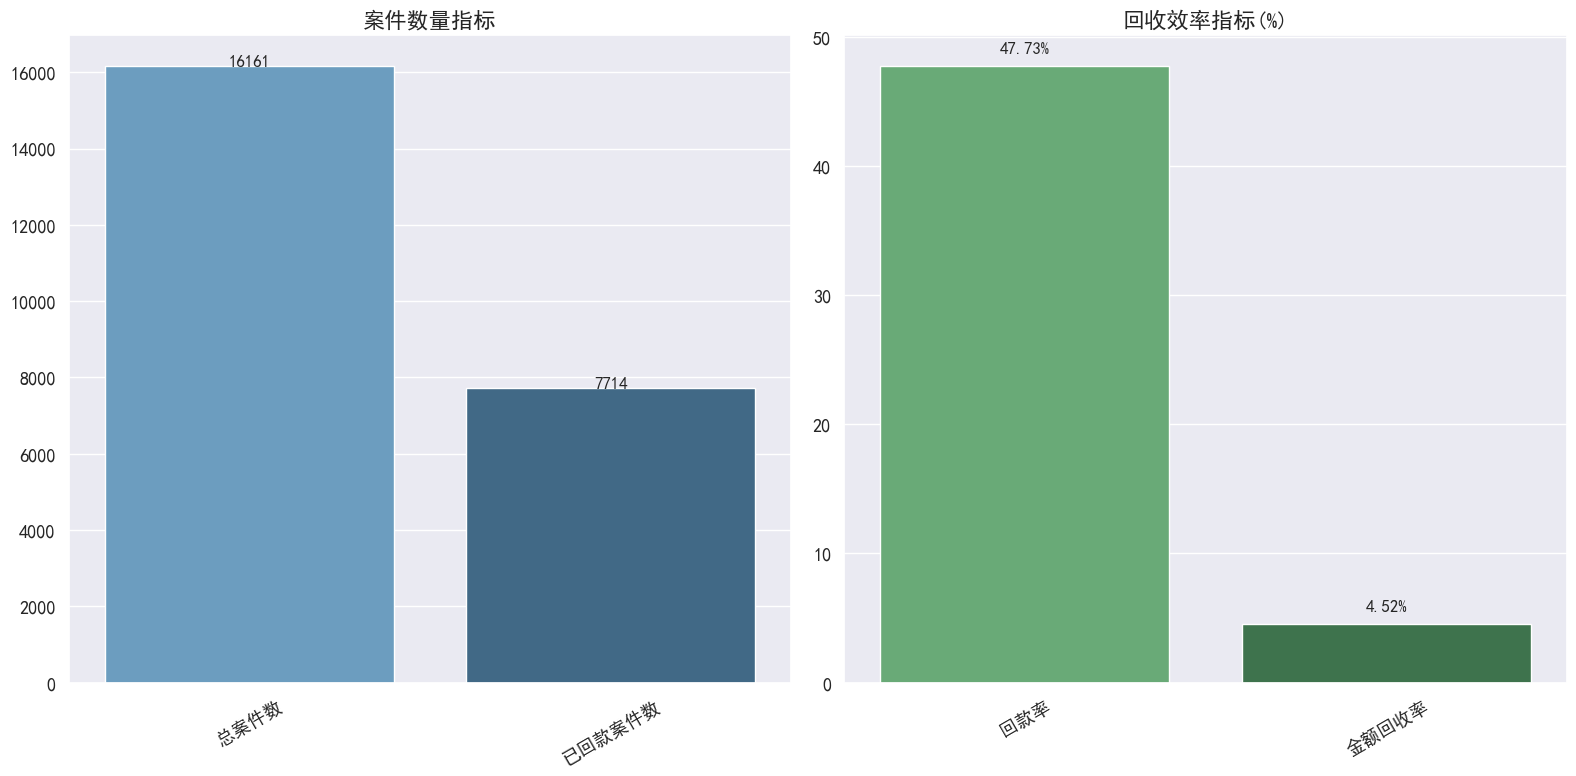

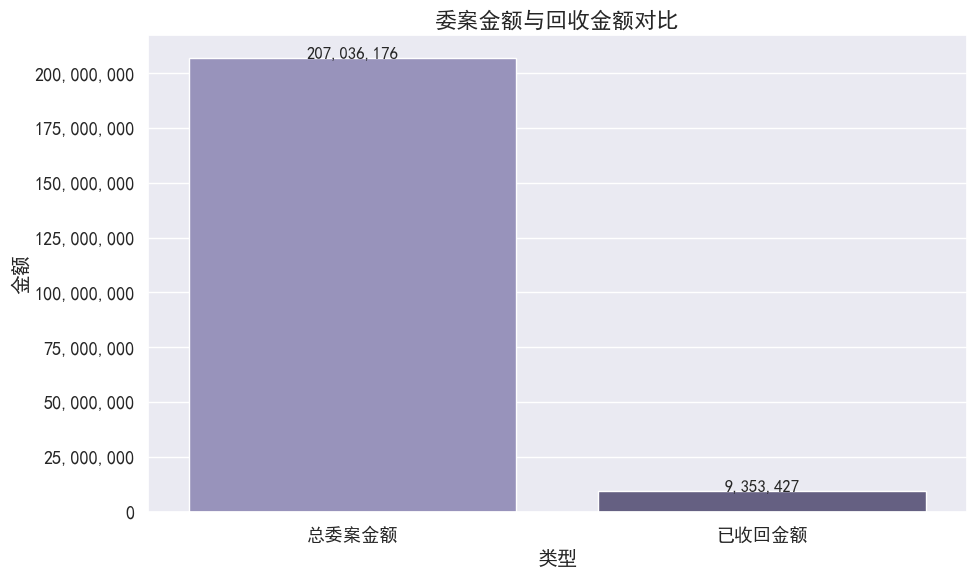

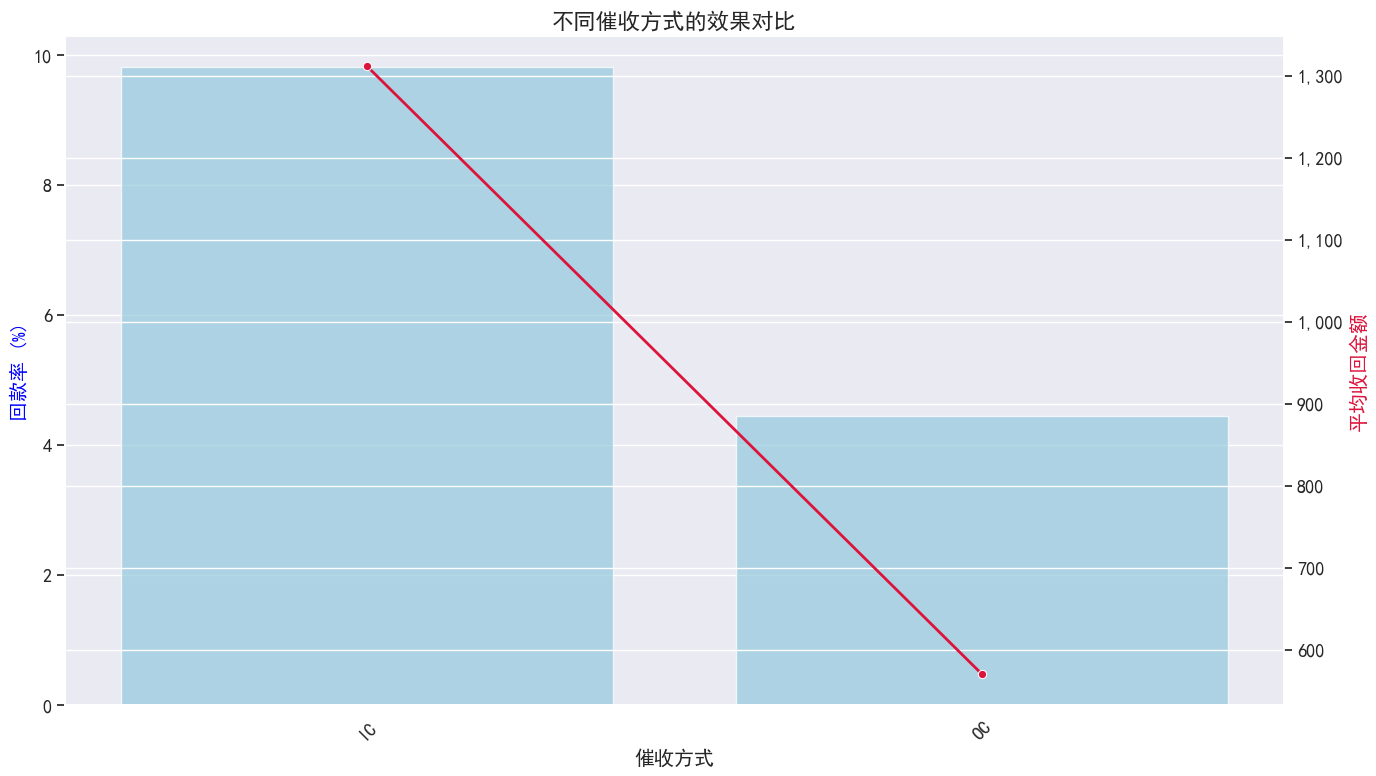

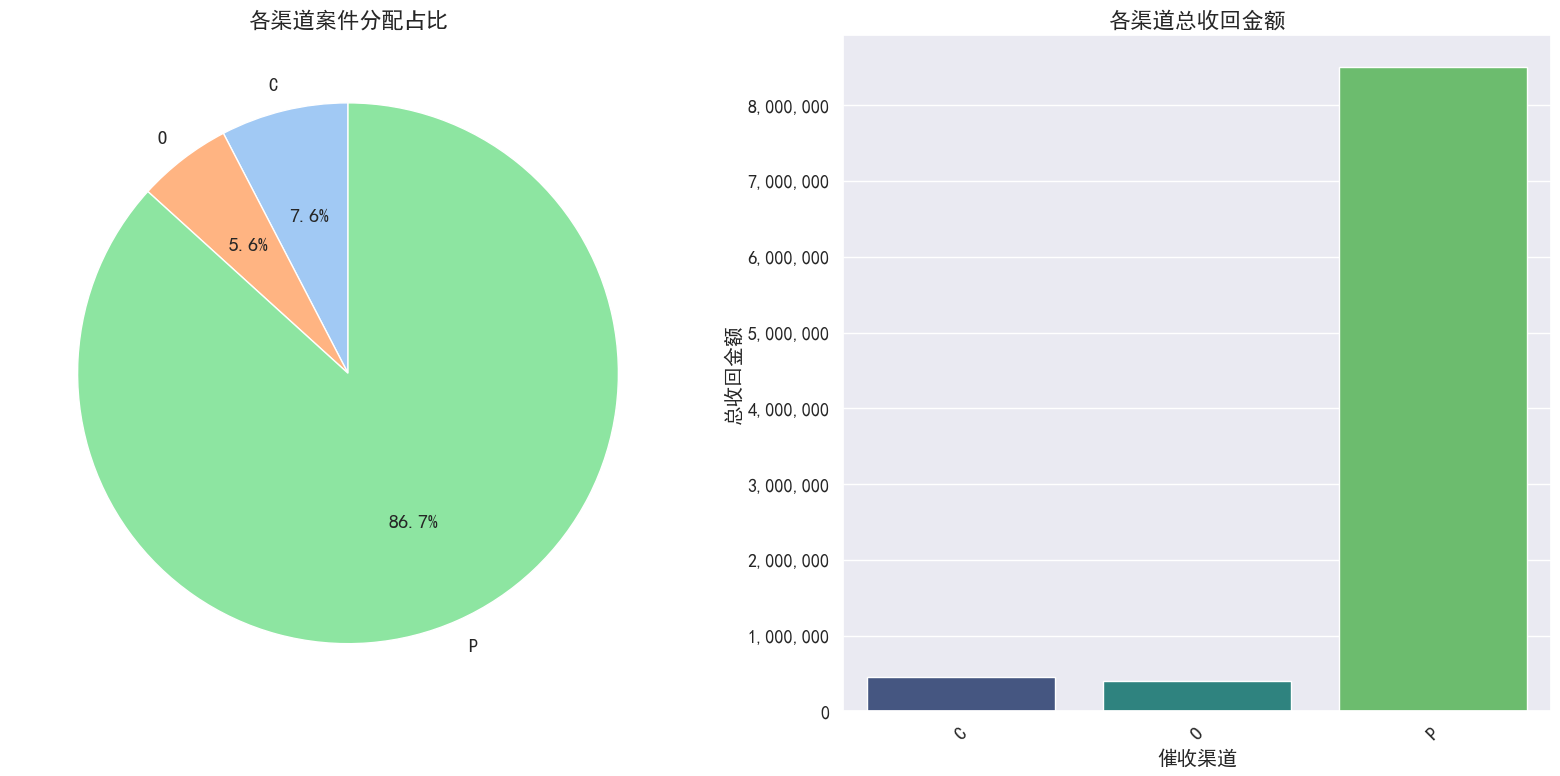

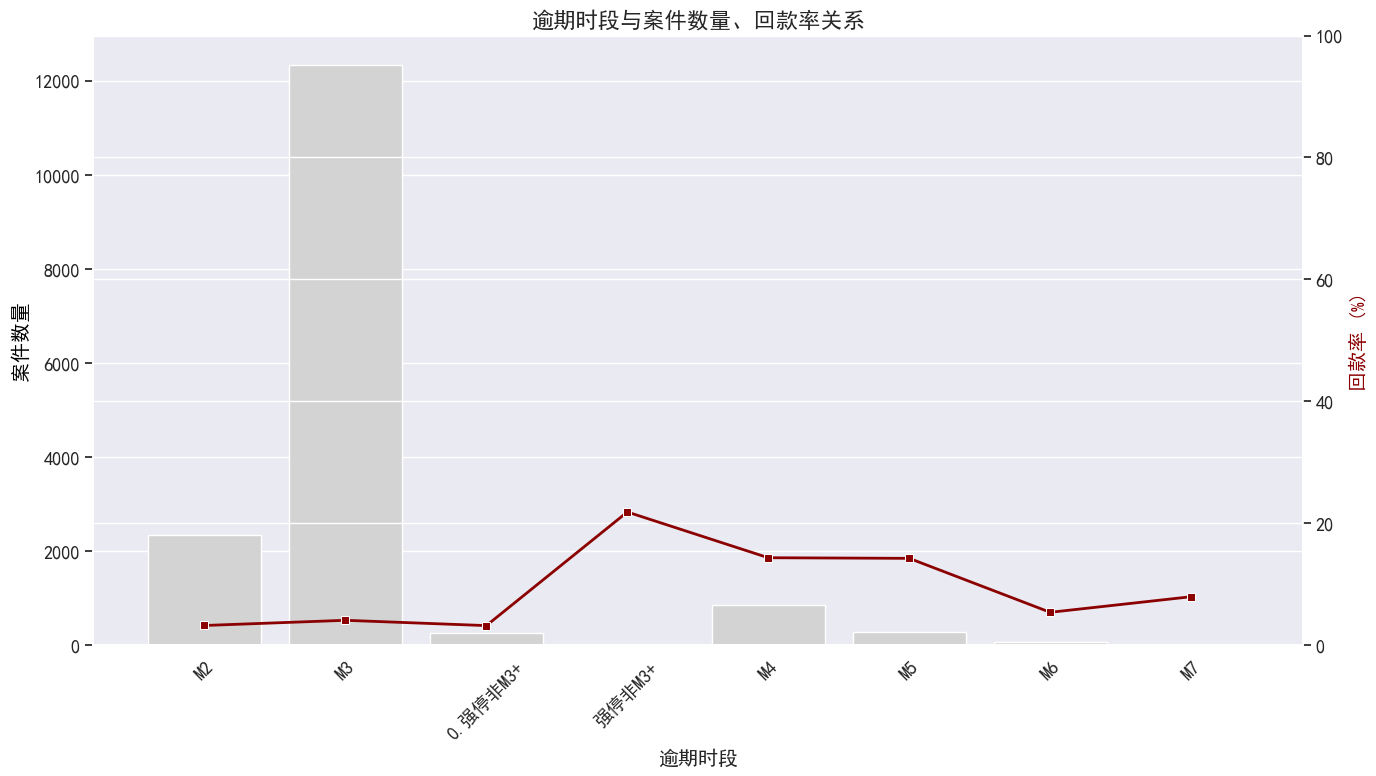

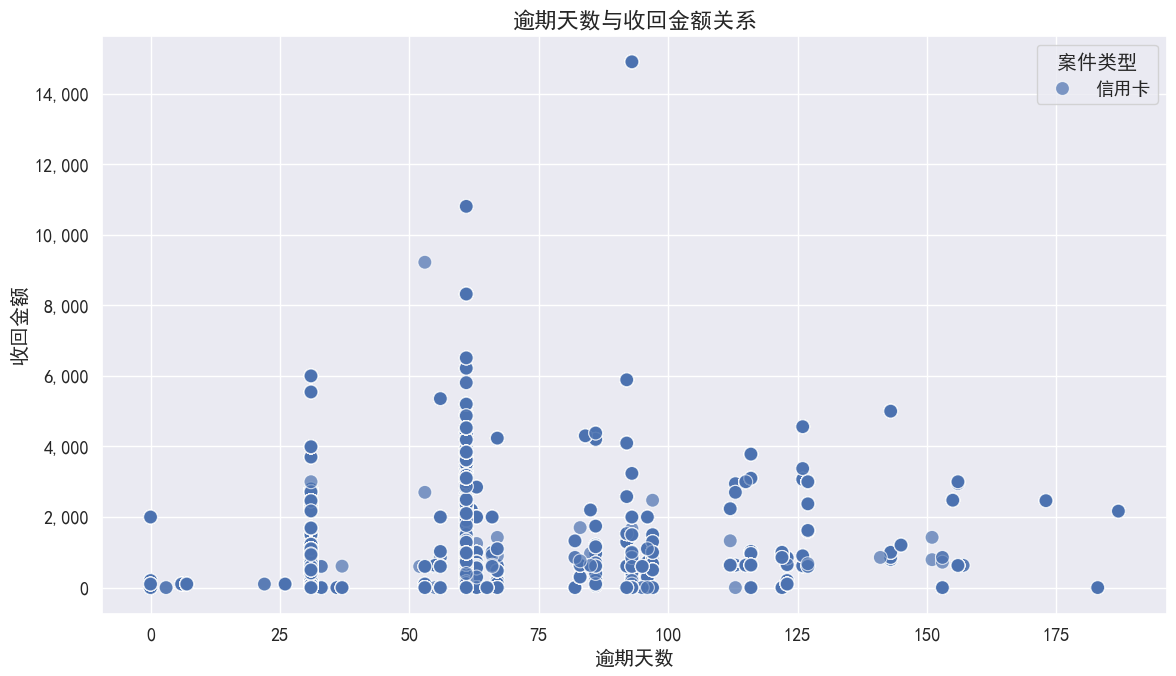

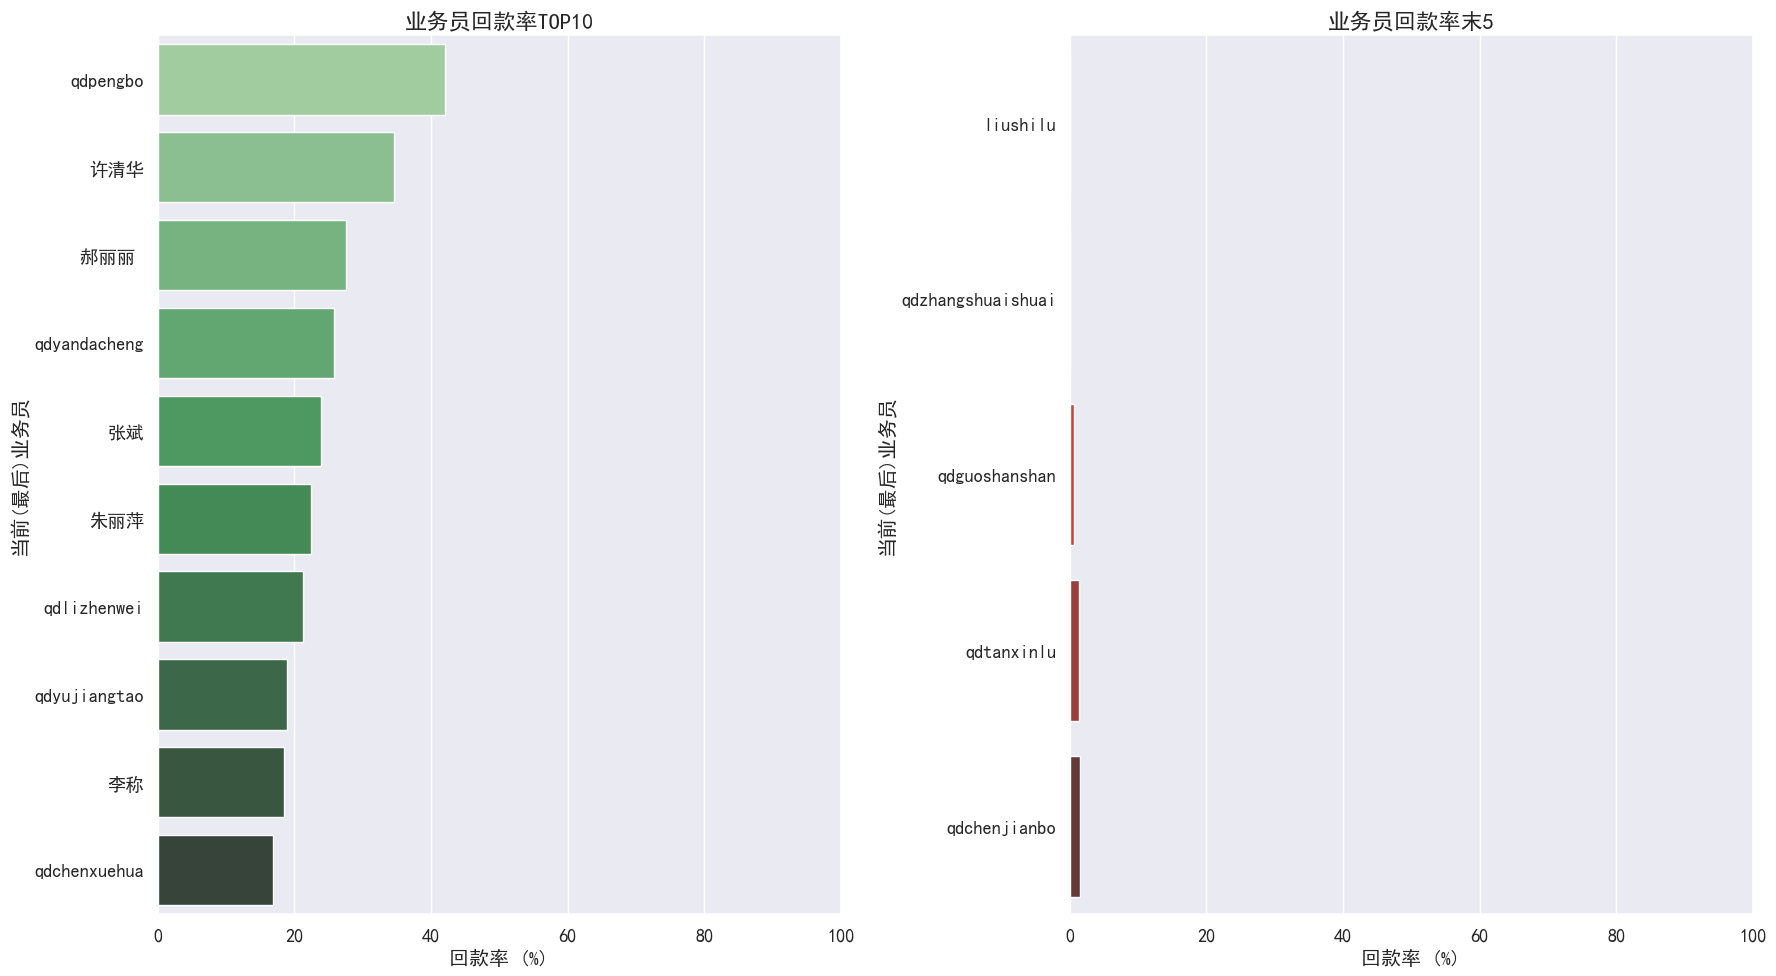

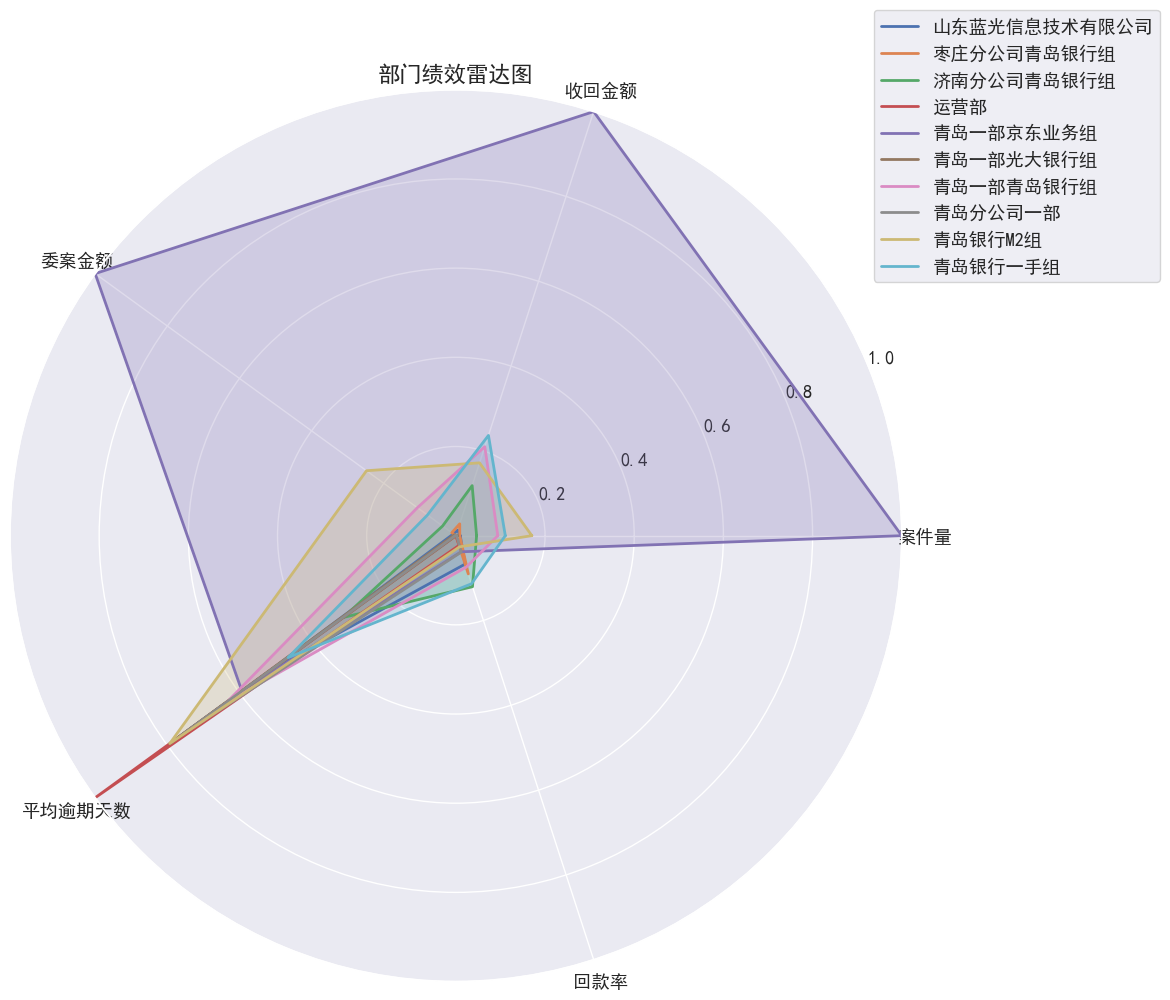

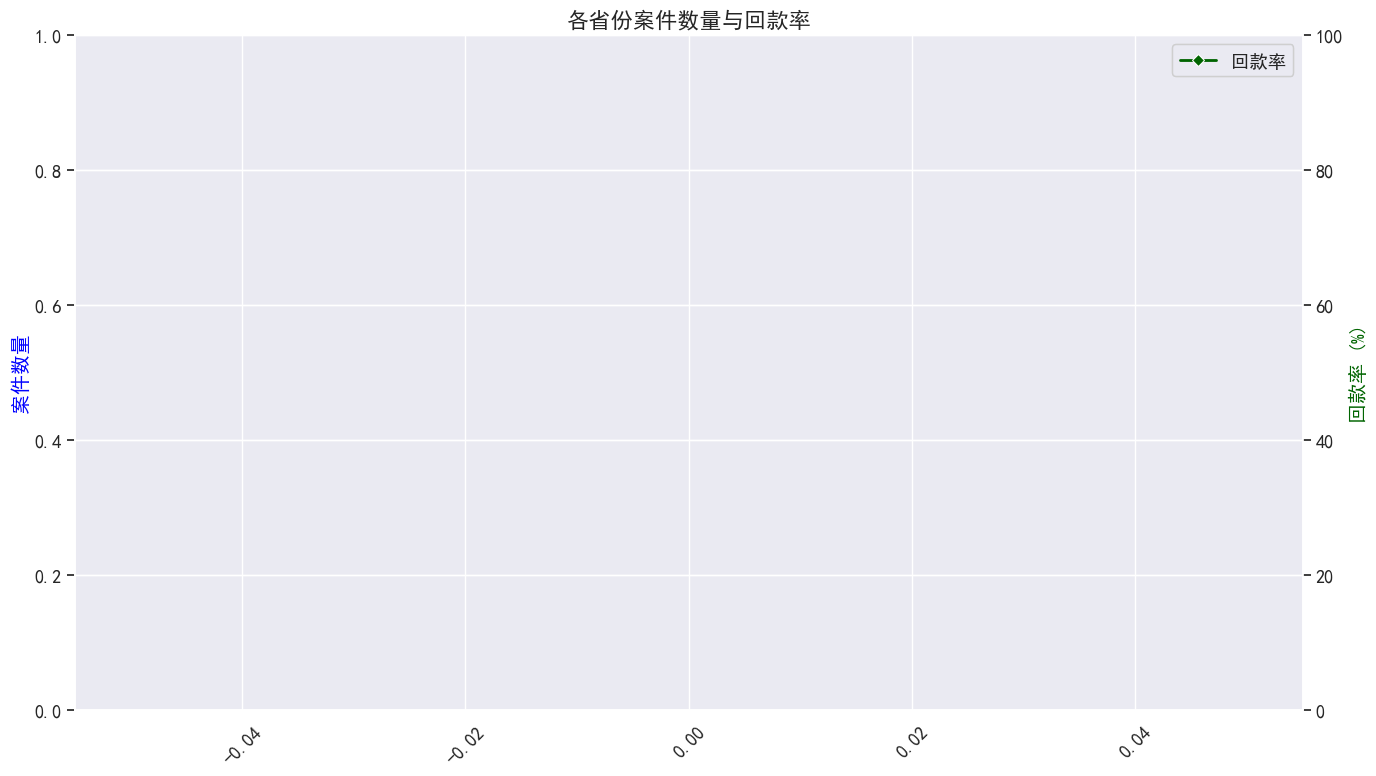

所有可视化结果已保存至 催收数据可视化报告 目录
可视化分析完成！请查看生成的图表报告


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
sns.set(font="SimHei", font_scale=1.2)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

class EnhancedCollectionAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.analysis_results = {}
        self.visualization_dir = "催收数据可视化报告"
        os.makedirs(self.visualization_dir, exist_ok=True)
    
    def load_data(self, date_columns=None):
        """加载并预处理数据"""
        try:
            self.data = pd.read_excel(self.file_path)
            print(f"成功加载数据：{self.data.shape[0]}条记录，{self.data.shape[1]}列")
            
            # 自动识别日期列并转换
            if date_columns is None:
                date_columns = [col for col in self.data.columns 
                               if '日期' in col or '时间' in col or '日' in col]
            
            for col in date_columns:
                self.data[col] = pd.to_datetime(self.data[col], errors='coerce')
            
            # 处理金额列
            money_cols = [col for col in self.data.columns 
                         if '金额' in col or '款' in col or '费' in col or '息' in col]
            for col in money_cols:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
                
            return self.data
        except Exception as e:
            print(f"数据加载失败: {str(e)}")
            return None
    
    def calculate_core_indicators(self):
        """计算核心业务指标"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 基础指标计算
        total_cases = self.data.shape[0]
        resolved_cases = self.data[self.data['收回金额'] > 0].shape[0]
        recovery_rate = resolved_cases / total_cases if total_cases > 0 else 0
        
        total_amount = self.data['委案金额'].sum()
        recovered_amount = self.data['收回金额'].sum()
        amount_recovery_rate = recovered_amount / total_amount if total_amount > 0 else 0
        
        # 存储核心指标
        self.analysis_results['core_indicators'] = {
            '总案件数': total_cases,
            '已回款案件数': resolved_cases,
            '回款率': round(recovery_rate * 100, 2),
            '总委案金额': round(total_amount, 2),
            '已收回金额': round(recovered_amount, 2),
            '金额回收率': round(amount_recovery_rate * 100, 2),
            '平均逾期天数': round(self.data['过期天数'].mean(), 1) if '过期天数' in self.data.columns else None
        }
        
        return self.analysis_results['core_indicators']
    
    def visualize_core_indicators(self):
        """可视化核心指标"""
        if 'core_indicators' not in self.analysis_results:
            print("请先计算核心指标")
            return
        
        # 1. 核心指标概览图
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        
        # 左侧：数量指标
        count_indicators = {
            '总案件数': self.analysis_results['core_indicators']['总案件数'],
            '已回款案件数': self.analysis_results['core_indicators']['已回款案件数']
        }
        sns.barplot(x=list(count_indicators.keys()), y=list(count_indicators.values()), 
                   ax=axes[0], palette='Blues_d')
        axes[0].set_title('案件数量指标', fontsize=16)
        axes[0].tick_params(axis='x', rotation=30)
        for i, v in enumerate(count_indicators.values()):
            axes[0].text(i, v + 5, str(v), ha='center', fontsize=12)
        
        # 右侧：比率指标
        rate_indicators = {
            '回款率': self.analysis_results['core_indicators']['回款率'],
            '金额回收率': self.analysis_results['core_indicators']['金额回收率']
        }
        sns.barplot(x=list(rate_indicators.keys()), y=list(rate_indicators.values()), 
                   ax=axes[1], palette='Greens_d')
        axes[1].set_title('回收效率指标(%)', fontsize=16)
        axes[1].tick_params(axis='x', rotation=30)
        for i, v in enumerate(rate_indicators.values()):
            axes[1].text(i, v + 1, f"{v}%", ha='center', fontsize=12)
        
        plt.tight_layout()
        plt.show()
        plt.savefig(os.path.join(self.visualization_dir, '核心指标概览.png'), dpi=300)
        plt.close()
        
        # 2. 金额指标对比图
        fig, ax = plt.subplots(figsize=(10, 6))
        amount_data = pd.DataFrame({
            '类型': ['总委案金额', '已收回金额'],
            '金额': [
                self.analysis_results['core_indicators']['总委案金额'],
                self.analysis_results['core_indicators']['已收回金额']
            ]
        })
        
        sns.barplot(x='类型', y='金额', data=amount_data, palette='Purples_d', ax=ax)
        ax.set_title('委案金额与回收金额对比', fontsize=16)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))  # 格式化金额显示
        for i, v in enumerate(amount_data['金额']):
            ax.text(i, v + 1000, f'{v:,.0f}', ha='center', fontsize=12)
        
        plt.tight_layout()
        plt.show()
        plt.savefig(os.path.join(self.visualization_dir, '金额指标对比.png'), dpi=300)
        plt.close()
    
    def visualize_collection_strategies(self):
        """可视化不同催收策略的效果"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 1. 催收方式效果分析（回款率+平均回款金额）
        if '催收方式' in self.data.columns:
            method_data = self.data.groupby('催收方式').agg({
                '收回金额': ['sum', 'mean'],
                '委案金额': 'sum',
                '客户': 'count'
            }).reset_index()
            method_data.columns = ['催收方式', '总收回金额', '平均收回金额', '总委案金额', '案件数']
            method_data['回款率'] = (method_data['总收回金额'] / method_data['总委案金额'] * 100).round(2)
            method_data = method_data[method_data['案件数'] > 0]  # 过滤无案件的方式
            
            # 创建双轴图表
            fig, ax1 = plt.subplots(figsize=(14, 8))
            
            # 主轴：回款率
            sns.barplot(x='催收方式', y='回款率', data=method_data, ax=ax1, color='skyblue', alpha=0.7)
            ax1.set_ylabel('回款率 (%)', color='blue')
            ax1.tick_params(axis='x', rotation=45)
            
            # 副轴：平均收回金额
            ax2 = ax1.twinx()
            sns.lineplot(x='催收方式', y='平均收回金额', data=method_data, ax=ax2, 
                        marker='o', color='crimson', linewidth=2)
            ax2.set_ylabel('平均收回金额', color='crimson')
            ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
            
            plt.title('不同催收方式的效果对比', fontsize=16)
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '催收方式效果对比.png'), dpi=300)
            plt.close()
        
        # 2. 催收渠道分布与效果
        if '催收渠道' in self.data.columns:
            channel_data = self.data.groupby('催收渠道').agg({
                '客户': 'count',
                '收回金额': 'sum'
            }).reset_index()
            channel_data.columns = ['催收渠道', '案件数量', '总收回金额']
            
            # 饼图：案件分布
            fig, axes = plt.subplots(1, 2, figsize=(16, 8))
            
            axes[0].pie(channel_data['案件数量'], labels=channel_data['催收渠道'], 
                       autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
            axes[0].set_title('各渠道案件分配占比', fontsize=16)
            
            # 柱状图：回收金额
            sns.barplot(x='催收渠道', y='总收回金额', data=channel_data, 
                       ax=axes[1], palette='viridis')
            axes[1].set_title('各渠道总收回金额', fontsize=16)
            axes[1].tick_params(axis='x', rotation=45)
            axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
            
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '催收渠道分析.png'), dpi=300)
            plt.close()
    
    def visualize_overdue_patterns(self):
        """可视化逾期模式与还款行为"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 1. 逾期时段分布与回款率
        if '逾期时段' in self.data.columns:
            # 确保逾期时段按顺序排列
            overdue_order = sorted(self.data['逾期时段'].unique(), 
                                  key=lambda x: int(''.join(filter(str.isdigit, str(x)))) if any(c.isdigit() for c in str(x)) else 0)
            
            overdue_data = self.data.groupby('逾期时段').agg({
                '客户': 'count',
                '收回金额': 'sum',
                '委案金额': 'sum'
            }).reindex(overdue_order).reset_index()
            
            overdue_data['回款率'] = (overdue_data['收回金额'] / overdue_data['委案金额'] * 100).round(2)
            
            fig, ax1 = plt.subplots(figsize=(14, 8))
            
            # 主轴：案件数量
            sns.barplot(x='逾期时段', y='客户', data=overdue_data, ax=ax1, color='lightgrey')
            ax1.set_ylabel('案件数量', color='black')
            ax1.tick_params(axis='x', rotation=45)
            
            # 副轴：回款率
            ax2 = ax1.twinx()
            sns.lineplot(x='逾期时段', y='回款率', data=overdue_data, ax=ax2,
                        marker='s', color='darkred', linewidth=2)
            ax2.set_ylabel('回款率 (%)', color='darkred')
            ax2.set_ylim(0, 100)
            
            plt.title('逾期时段与案件数量、回款率关系', fontsize=16)
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '逾期时段分析.png'), dpi=300)
            plt.close()
        
        # 2. 逾期天数与回款金额散点图
        if '过期天数' in self.data.columns and '收回金额' in self.data.columns:
            fig, ax = plt.subplots(figsize=(12, 7))
            
            # 按案件类型着色
            if '案件类型' in self.data.columns:
                sns.scatterplot(x='过期天数', y='收回金额', hue='案件类型', 
                               data=self.data, ax=ax, alpha=0.7, s=100)
            else:
                sns.scatterplot(x='过期天数', y='收回金额', data=self.data, 
                               ax=ax, alpha=0.7, s=100, color='purple')
            
            ax.set_title('逾期天数与收回金额关系', fontsize=16)
            ax.set_xlabel('逾期天数')
            ax.set_ylabel('收回金额')
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
            
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '逾期天数与回款关系.png'), dpi=300)
            plt.close()
    
    def visualize_performance(self):
        """可视化催收人员与部门绩效"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 1. 业务员绩效TOP10与末5对比
        if '当前(最后)业务员' in self.data.columns:
            perf_data = self.data.groupby('当前(最后)业务员').agg({
                '收回金额': 'sum',
                '委案金额': 'sum',
                '客户': 'count'
            }).reset_index()
            perf_data['回款率'] = (perf_data['收回金额'] / perf_data['委案金额'] * 100).round(2)
            perf_data = perf_data[perf_data['客户'] > 0].sort_values('回款率', ascending=False)
            
            # 取TOP10和末5
            top10 = perf_data.head(10)
            bottom5 = perf_data.tail(5).sort_values('回款率')
            
            fig, axes = plt.subplots(1, 2, figsize=(18, 10))
            
            # TOP10业务员
            sns.barplot(x='回款率', y='当前(最后)业务员', data=top10, 
                       ax=axes[0], palette='Greens_d')
            axes[0].set_title('业务员回款率TOP10', fontsize=16)
            axes[0].set_xlabel('回款率 (%)')
            axes[0].set_xlim(0, 100)
            
            # 末5业务员
            sns.barplot(x='回款率', y='当前(最后)业务员', data=bottom5, 
                       ax=axes[1], palette='Reds_d')
            axes[1].set_title('业务员回款率末5', fontsize=16)
            axes[1].set_xlabel('回款率 (%)')
            axes[1].set_xlim(0, 100)
            
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '业务员绩效对比.png'), dpi=300)
            plt.close()
        
        # 2. 部门绩效雷达图
        if '案件所在部门' in self.data.columns:
            dept_data = self.data.groupby('案件所在部门').agg({
                '客户': 'count',
                '收回金额': 'sum',
                '委案金额': 'sum',
                '过期天数': 'mean'
            }).reset_index()
            
            # 标准化各指标（便于雷达图比较）
            dept_norm = dept_data.copy()
            for col in ['客户', '收回金额', '委案金额', '过期天数']:
                dept_norm[col] = (dept_norm[col] - dept_norm[col].min()) / (dept_norm[col].max() - dept_norm[col].min())
            
            # 计算回款率
            dept_norm['回款率'] = (dept_data['收回金额'] / dept_data['委案金额']).fillna(0)
            
            # 绘制雷达图
            labels = ['案件量', '收回金额', '委案金额', '平均逾期天数', '回款率']
            num_vars = len(labels)
            
            fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
            
            for i, row in dept_norm.iterrows():
                values = [row['客户'], row['收回金额'], row['委案金额'], 
                         1 - row['过期天数'], row['回款率']]  # 逾期天数取反，值越高越好
                angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
                values += values[:1]
                angles += angles[:1]
                
                ax.plot(angles, values, linewidth=2, linestyle='solid', 
                       label=row['案件所在部门'])
                ax.fill(angles, values, alpha=0.25)
            
            ax.set_thetagrids(np.degrees(angles[:-1]), labels)
            ax.set_ylim(0, 1)
            ax.set_title('部门绩效雷达图', fontsize=16)
            plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
            
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '部门绩效雷达图.png'), dpi=300)
            plt.close()
    
    def visualize_geographical(self):
        """可视化地区分布与催收效果"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 地区分布与回款率
        if '省份' in self.data.columns:
            geo_data = self.data.groupby('省份').agg({
                '客户': 'count',
                '收回金额': 'sum',
                '委案金额': 'sum'
            }).reset_index()
            geo_data['回款率'] = (geo_data['收回金额'] / geo_data['委案金额'] * 100).round(2)
            geo_data = geo_data.sort_values('客户', ascending=False).head(15)  # 取案件数前15的省份
            
            fig, ax = plt.subplots(figsize=(14, 8))
            
            sns.barplot(x='省份', y='客户', data=geo_data, ax=ax, color='lightblue', 
                       label='案件数量')
            ax.set_ylabel('案件数量', color='blue')
            
            ax2 = ax.twinx()
            sns.lineplot(x='省份', y='回款率', data=geo_data, ax=ax2, 
                        marker='D', color='darkgreen', linewidth=2, label='回款率')
            ax2.set_ylabel('回款率 (%)', color='darkgreen')
            ax2.set_ylim(0, 100)
            
            ax.set_title('各省份案件数量与回款率', fontsize=16)
            ax.tick_params(axis='x', rotation=45)
            
            # 合并图例
            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax.legend(lines + lines2, labels + labels2, loc='upper right')
            
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(self.visualization_dir, '地区分布分析.png'), dpi=300)
            plt.close()
    
    def run_full_visualization(self):
        """执行全套可视化分析"""
        print("开始升成可视化报告...")
        self.visualize_core_indicators()
        self.visualize_collection_strategies()
        self.visualize_overdue_patterns()
        self.visualize_performance()
        self.visualize_geographical()
        print(f"所有可视化结果已保存至 {self.visualization_dir} 目录")

# 主函数
def main():
    # 替换为实际文件路径
    root_dir = 'D:\project\collection\data\qd'
    file_path = os.path.join(root_dir,"2010一手对应前催.xlsx")
    
    # 初始化分析器
    analyzer = EnhancedCollectionAnalyzer(file_path)
    
    # 加载数据
    analyzer.load_data()
    
    # 计算核心指标
    analyzer.calculate_core_indicators()
    
    # 执行全套可视化分析
    analyzer.run_full_visualization()
    
    print("可视化分析完成！请查看生成的图表报告")

if __name__ == "__main__":
    main()
    

成功加载数据：2044条记录，75列

===== 历史还款模式分析 =====
历史还款模式分析完成

===== 风险因素分析 =====
风险因素分析完成

===== 欠款构成分析 =====
欠款构成分析完成

===== 关键发现可视化 =====


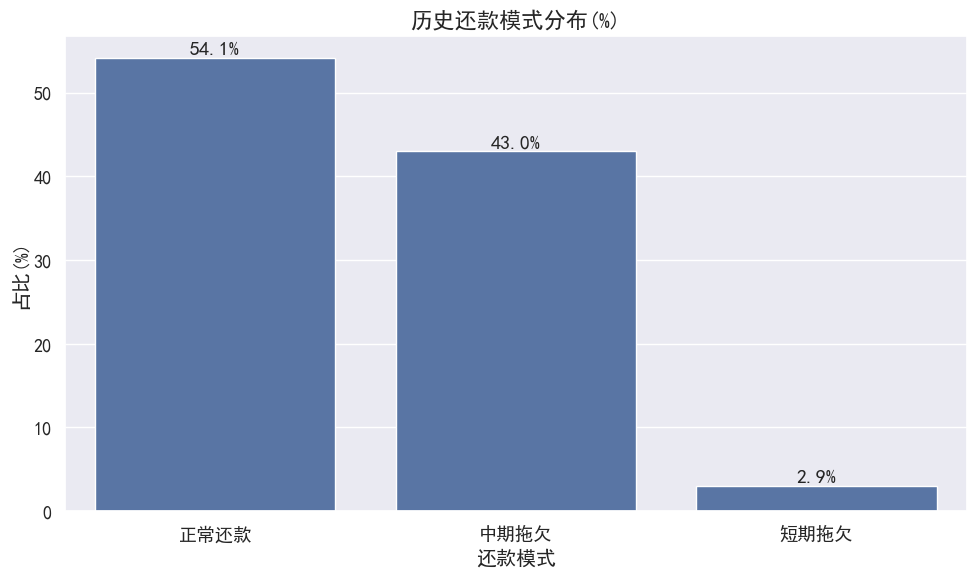

<Figure size 1200x700 with 0 Axes>

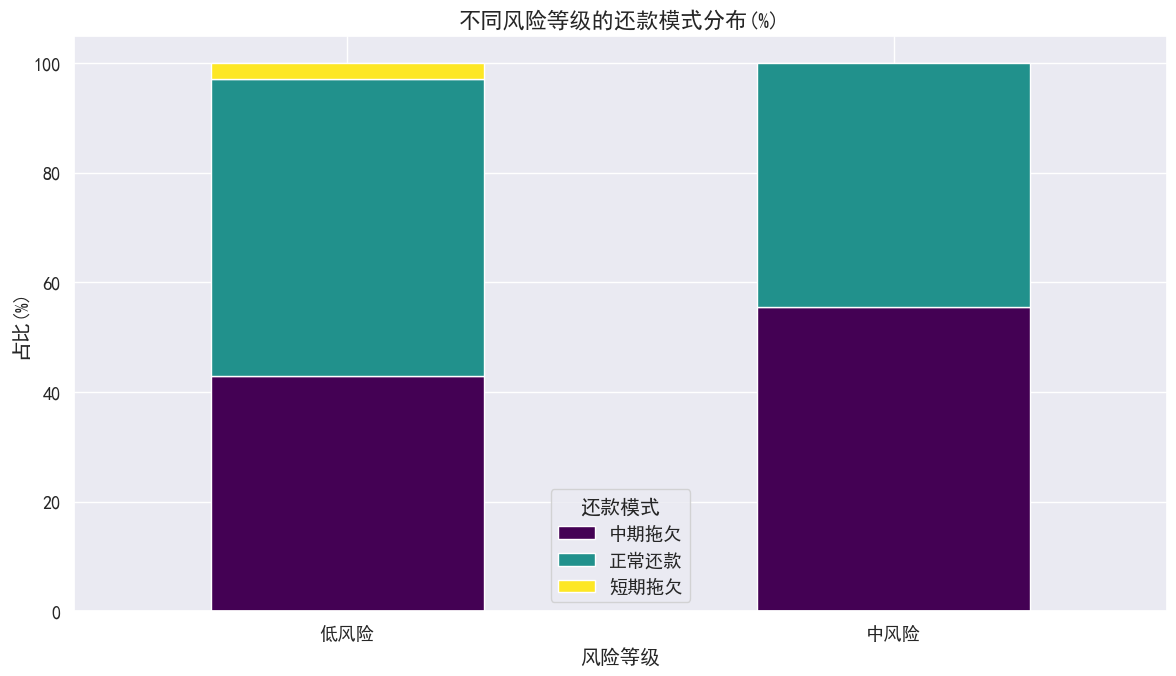

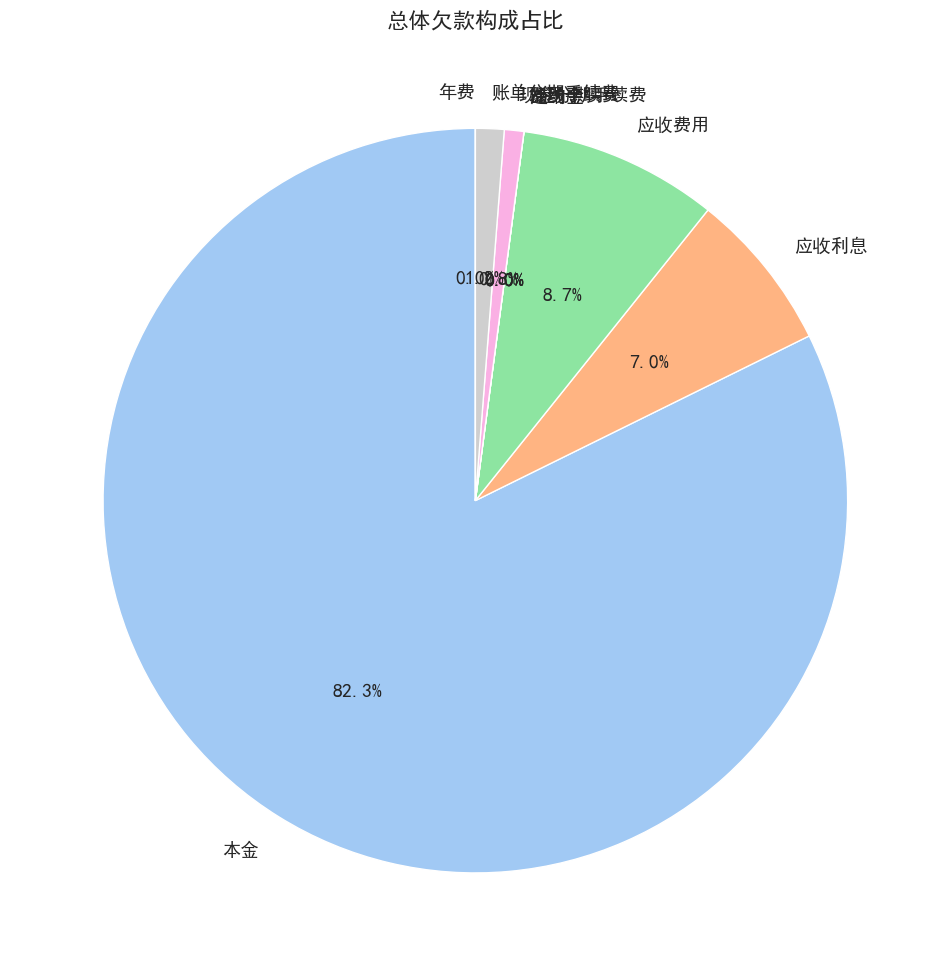

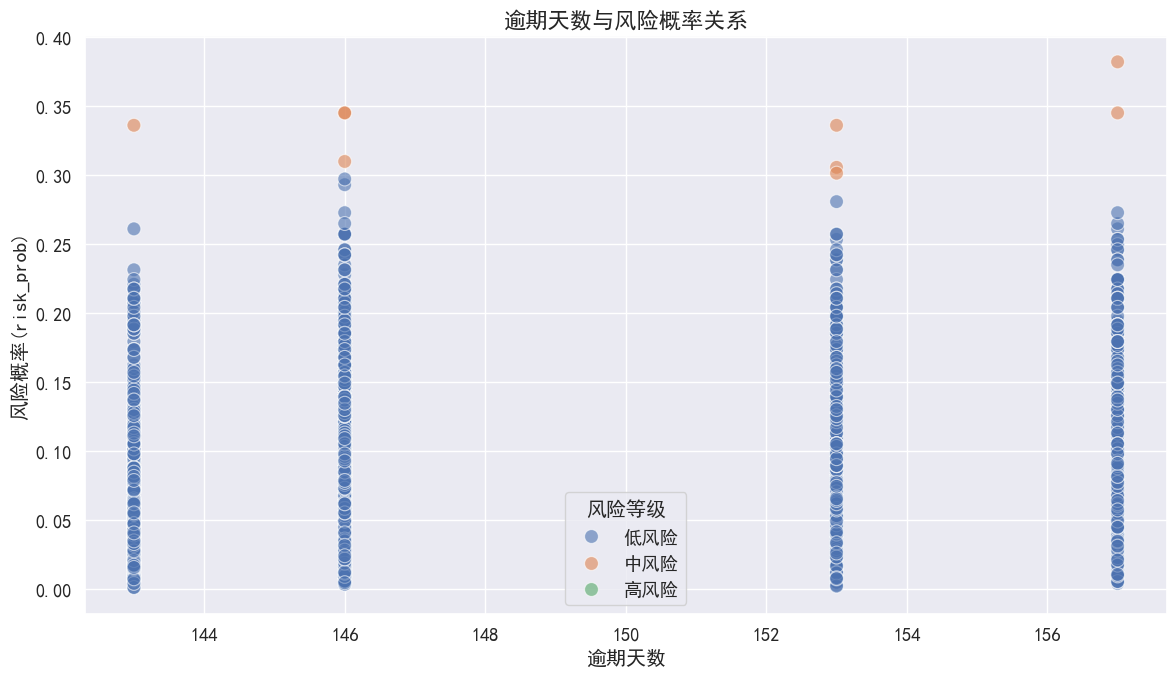

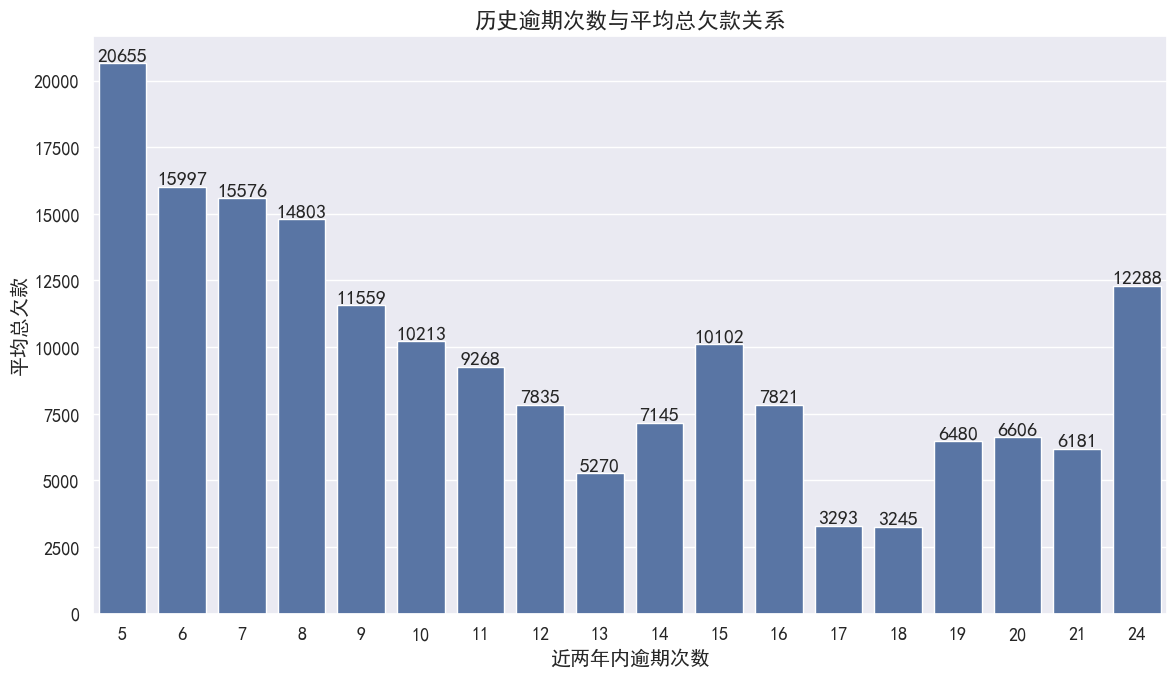


2406三手案件催收策略报告

一、整体情况总结:
• 长期拖欠案件占比: 0.0%
• 中期拖欠案件占比: 43.0%
• 高风险案件数量: 0 (0.0%)

二、分类催收策略建议:

1. 长期拖欠且高风险案件:
   • 策略: 启动法律程序准备，联系备用联系人及单位
   • 重点: 核实户籍地址和单位地址准确性，评估资产情况

2. 中期拖欠案件:
   • 策略: 升级催收强度，增加联系频率，上门催收
   • 重点: 分析历史还款记录，制定个性化还款方案

3. 短期拖欠案件:
   • 策略: 强调逾期后果，提供还款便利渠道
   • 重点: 检查是否有自动还款失败等技术性问题

三、特殊关注点:
• 欠款主要构成: 本金 (82.3%)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
sns.set(font="SimHei", font_scale=1.2)
plt.rcParams['axes.unicode_minus'] = False

class ThreeHandCollectionAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.analysis_results = {}
        
    def load_data(self):
        """加载并预处理2406三手数据"""
        try:
            self.data = pd.read_excel(self.file_path)
            print(f"成功加载数据：{self.data.shape[0]}条记录，{self.data.shape[1]}列")
            
            # 处理日期列
            date_columns = [col for col in self.data.columns if '日期' in col]
            for col in date_columns:
                self.data[col] = pd.to_datetime(self.data[col], errors='coerce')
            
            # 处理金额列
            money_columns = [col for col in self.data.columns 
                           if '金额' in col or '款' in col or '费' in col or '息' in col]
            for col in money_columns:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
                
            # 处理历史还款列（上1-8个月最小还款额）
            self.payment_history_cols = [f'上{i}个月最小还款额' for i in range(1,9)] + ['当期最小还款额']
            
            return self.data
        except Exception as e:
            print(f"数据加载失败: {str(e)}")
            return None
    
    def analyze_payment_history(self):
        """分析历史还款模式（核心特征）"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 1. 历史还款达标情况统计
        payment_analysis = {}
        
        # 计算每个客户连续未达标月数
        self.data['连续未达标月数'] = 0
        for idx, row in self.data.iterrows():
            consecutive = 0
            for col in self.payment_history_cols:
                # 假设0表示未达标（根据实际业务逻辑调整）
                if pd.isna(row[col]) or row[col] <= 0:
                    consecutive += 1
                else:
                    consecutive = 0  # 重置连续计数
            self.data.at[idx, '连续未达标月数'] = consecutive
        
        # 2. 历史还款模式分类
        def classify_payment_pattern(row):
            if row['连续未达标月数'] >= 6:
                return '长期拖欠'
            elif row['连续未达标月数'] >= 3:
                return '中期拖欠'
            elif row['连续未达标月数'] > 0:
                return '短期拖欠'
            else:
                return '正常还款'
        
        self.data['还款模式'] = self.data.apply(classify_payment_pattern, axis=1)
        payment_analysis['还款模式分布'] = self.data['还款模式'].value_counts(normalize=True) * 100
        
        # 3. 历史还款与当前欠款的关系
        if '总欠款' in self.data.columns:
            corr_data = self.data[[col for col in self.payment_history_cols if col in self.data.columns] + ['总欠款']]
            payment_analysis['历史还款与总欠款相关性'] = corr_data.corr()['总欠款']
        
        self.analysis_results['payment_history'] = payment_analysis
        print("历史还款模式分析完成")
        return payment_analysis
    
    def analyze_risk_factors(self):
        """分析风险因素（重点关注risk_prob和逾期特征）"""
        if self.data is None:
            print("请先加载数据")
            return
        
        risk_analysis = {}
        
        # 1. 风险概率(risk_prob)分布
        if 'risk_prob' in self.data.columns:
            risk_analysis['risk_prob分布'] = self.data['risk_prob'].describe()
            
            # 风险等级划分
            self.data['风险等级'] = pd.cut(
                self.data['risk_prob'],
                bins=[-0.01, 0.3, 0.7, 1.01],
                labels=['低风险', '中风险', '高风险']
            )
            risk_analysis['风险等级分布'] = self.data['风险等级'].value_counts()
        
        # 2. 逾期特征与风险的关系
        if '逾期天数' in self.data.columns and 'risk_prob' in self.data.columns:
            risk_analysis['逾期天数与风险相关性'] = self.data['逾期天数'].corr(self.data['risk_prob'])
        
        # 3. 历史逾期次数分析
        if '近两年内逾期次数' in self.data.columns:
            risk_analysis['近两年内逾期次数分布'] = self.data['近两年内逾期次数'].value_counts()
            
            # 逾期次数与当前欠款关系
            if '总欠款' in self.data.columns:
                risk_analysis['逾期次数与总欠款关系'] = self.data.groupby('近两年内逾期次数')['总欠款'].mean()
        
        self.analysis_results['risk_factors'] = risk_analysis
        print("风险因素分析完成")
        return risk_analysis
    
    def analyze_debt_composition(self):
        """分析欠款构成（各类费用占比）"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 欠款构成列
        debt_components = [
            '本金', '应收利息', '应收费用', '违约金', '滞纳金',
            '取现手续费', '现金分期手续费', '账单分期手续费', '年费'
        ]
        # 过滤实际存在的列
        debt_components = [col for col in debt_components if col in self.data.columns]
        
        if not debt_components:
            print("未找到欠款构成相关列")
            return
        
        # 计算每笔案件的欠款构成占比
        debt_analysis = {}
        total_debt = self.data[debt_components].sum(axis=1)
        
        # 整体欠款构成
        debt_analysis['总体欠款构成(总额)'] = self.data[debt_components].sum()
        debt_analysis['总体欠款构成(占比)'] = (debt_analysis['总体欠款构成(总额)'] / 
                                            debt_analysis['总体欠款构成(总额)'].sum()) * 100
        
        # 按逾期天数分组的欠款构成
        if '逾期天数' in self.data.columns:
            self.data['逾期天数分组'] = pd.cut(
                self.data['逾期天数'],
                bins=[-1, 30, 90, 180, 360, float('inf')],
                labels=['30天内', '31-90天', '91-180天', '181-360天', '360天以上']
            )
            debt_analysis['按逾期天数分组的欠款构成'] = self.data.groupby('逾期天数分组')[debt_components].sum()
        
        self.analysis_results['debt_composition'] = debt_analysis
        print("欠款构成分析完成")
        return debt_analysis
    
    def visualize_key_findings(self):
        """可视化关键发现"""
        if not self.analysis_results:
            print("请先执行数据分析")
            return
        
        # 1. 还款模式分布
        if 'payment_history' in self.analysis_results:
            plt.figure(figsize=(10, 6))
            payment_patterns = self.analysis_results['payment_history']['还款模式分布']
            ax = sns.barplot(x=payment_patterns.index, y=payment_patterns.values)
            plt.title('历史还款模式分布(%)', fontsize=16)
            plt.ylabel('占比(%)')
            for i, v in enumerate(payment_patterns.values):
                ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
            plt.tight_layout()
            plt.show()
        
        # 2. 风险等级与还款模式关系
        if 'risk_prob' in self.data.columns and '还款模式' in self.data.columns:
            plt.figure(figsize=(12, 7))
            risk_payment = pd.crosstab(self.data['风险等级'], self.data['还款模式'], normalize='index') * 100
            risk_payment.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 7))
            plt.title('不同风险等级的还款模式分布(%)', fontsize=16)
            plt.ylabel('占比(%)')
            plt.xlabel('风险等级')
            plt.xticks(rotation=0)
            plt.legend(title='还款模式')
            plt.tight_layout()
            plt.show()
        
        # 3. 欠款构成饼图
        if 'debt_composition' in self.analysis_results:
            debt_composition = self.analysis_results['debt_composition']['总体欠款构成(占比)']
            plt.figure(figsize=(10, 10))
            plt.pie(debt_composition, labels=debt_composition.index, autopct='%1.1f%%',
                   startangle=90, colors=sns.color_palette('pastel'))
            plt.title('总体欠款构成占比', fontsize=16)
            plt.tight_layout()
            plt.show()
        
        # 4. 逾期天数与风险概率关系
        if '逾期天数' in self.data.columns and 'risk_prob' in self.data.columns:
            plt.figure(figsize=(12, 7))
            sns.scatterplot(x='逾期天数', y='risk_prob', hue='风险等级', data=self.data,
                           alpha=0.6, s=100)
            plt.title('逾期天数与风险概率关系', fontsize=16)
            plt.xlabel('逾期天数')
            plt.ylabel('风险概率(risk_prob)')
            plt.tight_layout()
            plt.show()
        
        # 5. 历史逾期次数与总欠款关系
        if 'risk_factors' in self.analysis_results and '逾期次数与总欠款关系' in self.analysis_results['risk_factors']:
            plt.figure(figsize=(12, 7))
            逾期_欠款关系 = self.analysis_results['risk_factors']['逾期次数与总欠款关系']
            ax = sns.barplot(x=逾期_欠款关系.index, y=逾期_欠款关系.values)
            plt.title('历史逾期次数与平均总欠款关系', fontsize=16)
            plt.xlabel('近两年内逾期次数')
            plt.ylabel('平均总欠款')
            for i, v in enumerate(逾期_欠款关系.values):
                ax.text(i, v + 100, f'{v:.0f}', ha='center')
            plt.tight_layout()
            plt.show()
    
    def generate_strategy_report(self):
        """生成针对性催收策略报告"""
        if not self.analysis_results:
            print("请先执行数据分析")
            return
        
        print("\n" + "="*60)
        print("2406三手案件催收策略报告")
        print("="*60)
        
        # 1. 整体情况总结
        print("\n一、整体情况总结:")
        if 'payment_history' in self.analysis_results:
            payment_patterns = self.analysis_results['payment_history']['还款模式分布']
            print(f"• 长期拖欠案件占比: {payment_patterns.get('长期拖欠', 0):.1f}%")
            print(f"• 中期拖欠案件占比: {payment_patterns.get('中期拖欠', 0):.1f}%")
        
        if 'risk_factors' in self.analysis_results and '风险等级分布' in self.analysis_results['risk_factors']:
            risk_dist = self.analysis_results['risk_factors']['风险等级分布']
            print(f"• 高风险案件数量: {risk_dist.get('高风险', 0)} ({risk_dist.get('高风险', 0)/sum(risk_dist)*100:.1f}%)")
        
        # 2. 针对性策略建议
        print("\n二、分类催收策略建议:")
        
        # 长期拖欠 + 高风险
        print("\n1. 长期拖欠且高风险案件:")
        print("   • 策略: 启动法律程序准备，联系备用联系人及单位")
        print("   • 重点: 核实户籍地址和单位地址准确性，评估资产情况")
        
        # 中期拖欠
        print("\n2. 中期拖欠案件:")
        print("   • 策略: 升级催收强度，增加联系频率，上门催收")
        print("   • 重点: 分析历史还款记录，制定个性化还款方案")
        
        # 短期拖欠
        print("\n3. 短期拖欠案件:")
        print("   • 策略: 强调逾期后果，提供还款便利渠道")
        print("   • 重点: 检查是否有自动还款失败等技术性问题")
        
        # 3. 特殊关注点
        print("\n三、特殊关注点:")
        if 'debt_composition' in self.analysis_results:
            top_component = self.analysis_results['debt_composition']['总体欠款构成(占比)'].idxmax()
            print(f"• 欠款主要构成: {top_component} ({self.analysis_results['debt_composition']['总体欠款构成(占比)'][top_component]:.1f}%)")
            if top_component in ['违约金', '滞纳金']:
                print("   - 建议: 可考虑适当减免违约金以促进本金回收")

# 主函数
def main():
    # 替换为实际文件路径
    root_dir = 'D:\project\collection\data\qd'
    file_path = os.path.join(root_dir,"2406三手.xlsx")
    
    # 初始化分析器
    analyzer = ThreeHandCollectionAnalyzer(file_path)
    
    # 加载数据
    analyzer.load_data()
    
    # 执行专项分析
    print("\n===== 历史还款模式分析 =====")
    analyzer.analyze_payment_history()
    
    print("\n===== 风险因素分析 =====")
    analyzer.analyze_risk_factors()
    
    print("\n===== 欠款构成分析 =====")
    analyzer.analyze_debt_composition()
    
    # 可视化分析结果
    print("\n===== 关键发现可视化 =====")
    analyzer.visualize_key_findings()
    
    # 生成策略报告
    analyzer.generate_strategy_report()

if __name__ == "__main__":
    main()
    

成功加载数据：2044条记录，75列

===== 历史还款模式分析 =====
历史还款模式分析完成

===== 风险因素分析 =====
风险因素分析完成

===== 欠款构成分析 =====
欠款构成分析完成

===== 高还款可能性用户识别 =====
筛选出高还款可能性用户 0 人，占总用户比例：0.00%

===== 分析结果可视化 =====


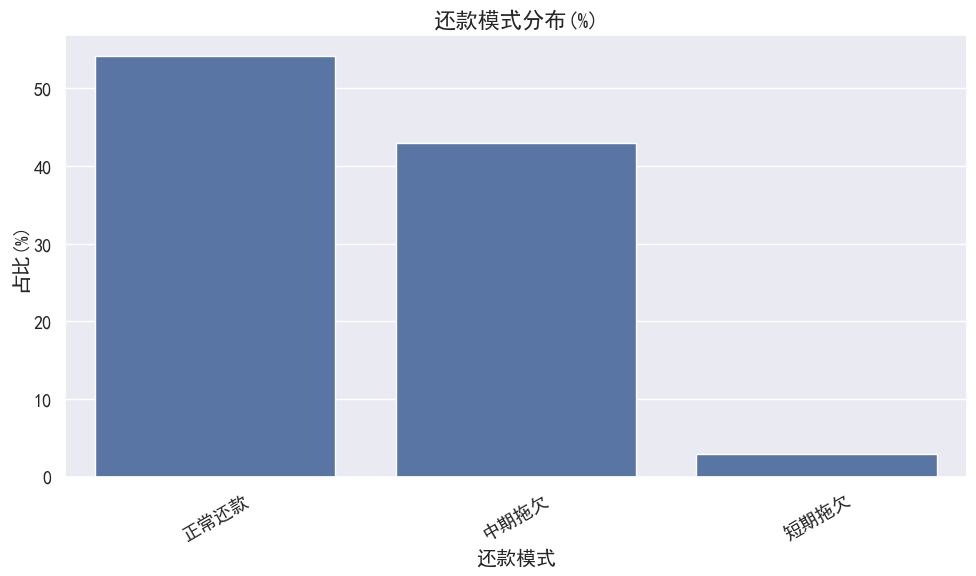

<Figure size 1200x700 with 0 Axes>

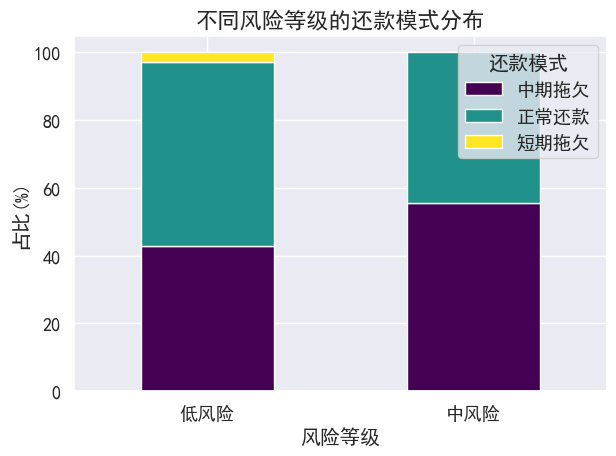

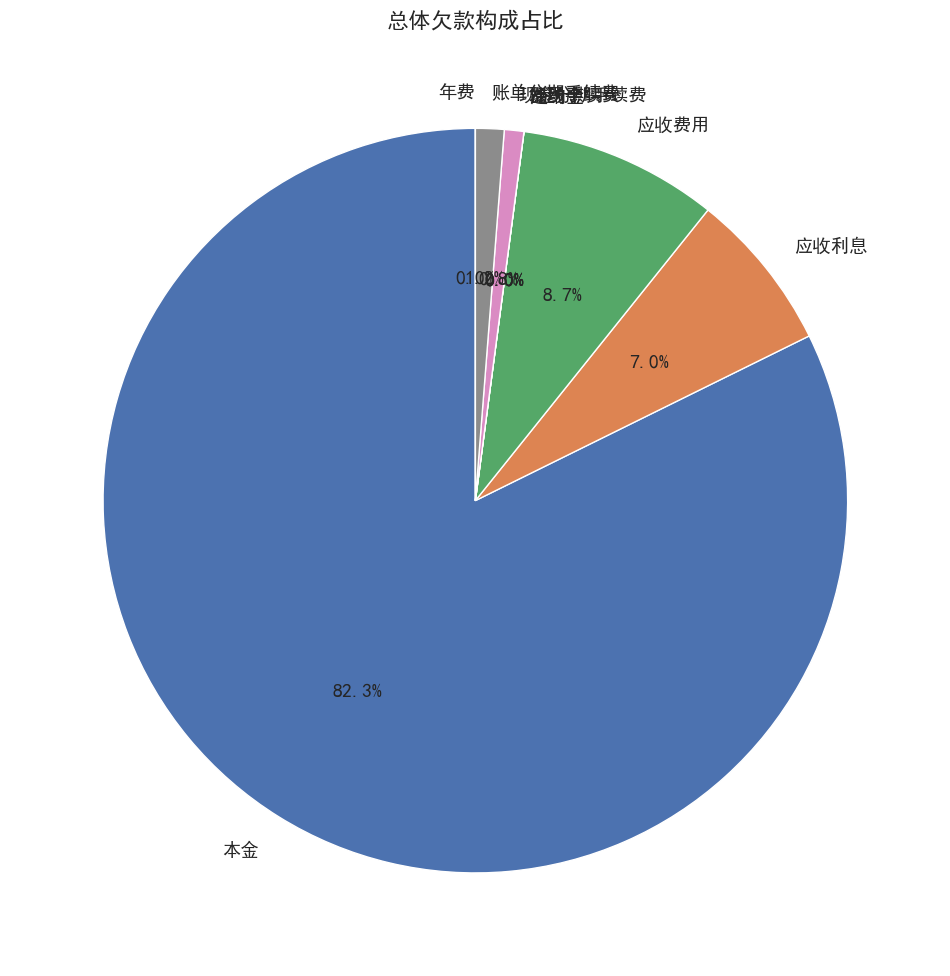

筛选出高还款可能性用户 0 人，占总用户比例：0.00%

===== 催收策略报告 =====

2406三手案件催收策略报告

一、整体情况总结
• 正常还款用户占比: 54.1%
• 长期拖欠用户占比: 0.0%

二、高还款可能性用户策略
1. 特征概览:
   • 近30天有还款记录，连续8个月以上正常还款
   • 无逾期历史，风险概率≤0.3，无违约金/滞纳金
   • 多开通自动还款，年龄集中在30-50岁
2. 催收建议:
   • 仅发送常规账单提醒，避免高频催收
   • 推荐提额、分期优惠等福利，强化良好习惯

三、高风险用户策略
1. 特征概览:
   • 连续逾期≥6个月，risk_prob>0.7，总欠款高
   • 违约金/滞纳金占比高，近两年逾期次数≥5次
2. 催收建议:
   • 启动法律程序准备，核实户籍及单位地址
   • 联系紧急联系人，评估资产偿债能力

四、欠款构成优化建议:
• 主要欠款构成为本金，占比82.3%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
sns.set(font="SimHei", font_scale=1.2)
plt.rcParams['axes.unicode_minus'] = False

class ThreeHandCollectionAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.analysis_results = {}
        # 基于实际列名定义还款历史字段
        self.payment_history_cols = [
            '上个月最小还款额', '上2个月最小还款额', '上3个月最小还款额',
            '上4个月最小还款额', '上5个月最小还款额', '上6个月最小还款额',
            '上7个月最小还款额', '上8个月最小还款额', '当期最小还款额'
        ]
        
    def load_data(self):
        """加载并预处理2406三手数据（适配实际列名）"""
        try:
            self.data = pd.read_excel(self.file_path)
            print(f"成功加载数据：{self.data.shape[0]}条记录，{self.data.shape[1]}列")
            
            # 处理日期列（重点适配最后还款日期的YYYYMMDD格式）
            date_cols = ['委托日期', '建账日期', '最后还款日期', '最后取现日期', 
                         '最后消费日期', '激活日期', '到期还款日期', '委外结束日期']
            for col in date_cols:
                if col == '最后还款日期':
                    # 特殊处理YYYYMMDD格式的最后还款日期
                    self.data[col] = pd.to_datetime(
                        self.data[col].astype(str),
                        format='%Y%m%d',
                        errors='coerce'
                    )
                else:
                    self.data[col] = pd.to_datetime(self.data[col], errors='coerce')
            
            # 处理金额列
            money_cols = [
                '当期账单金额', '最小还款额', '当期最小还款额', '总欠款', '本金',
                '应收利息', '应收费用', '违约金', '滞纳金', '取现手续费',
                '现金分期手续费', '账单分期手续费', '年费', '应收未收违约金',
                '一般分期未摊销金额', '现分本金', '现分手续费', '现分罚息',
                '信用额度', '历史最高授信额度'
            ] + self.payment_history_cols
            for col in money_cols:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
                
            # 添加辅助特征
            self._add_auxiliary_features()
                
            return self.data
        except Exception as e:
            print(f"数据加载失败: {str(e)}")
            return None
    
    def _add_auxiliary_features(self):
        """添加辅助分析特征（基于实际列名）"""
        # 1. 惩罚性费用相关特征
        self.data['惩罚性费用总额'] = self.data['违约金'] + self.data['滞纳金']
        self.data['惩罚性费用占比'] = self.data.apply(
            lambda row: 0 if row['总欠款'] == 0 else row['惩罚性费用总额'] / row['总欠款'],
            axis=1
        )
        self.data['无惩罚性费用'] = self.data['惩罚性费用占比'].apply(lambda x: 1 if x == 0 else 0)
        
        # 2. 近期还款行为特征
        self.data['最后还款距今天数'] = self.data['最后还款日期'].apply(
            lambda x: (datetime.now() - x).days if pd.notna(x) else np.nan
        )
        self.data['近30天有还款'] = self.data['最后还款距今天数'].apply(
            lambda x: 1 if pd.notna(x) and x <= 30 else 0
        )
        self.data['近90天有还款'] = self.data['最后还款距今天数'].apply(
            lambda x: 1 if pd.notna(x) and x <= 90 else 0
        )
        
        # 3. 自动还款特征
        self.data['开通自动还款'] = self.data['是否自扣'].apply(
            lambda x: 1 if str(x).lower() in ['是', '1', 'true'] else 0
        )
        
        # 4. 年龄分组特征（基于age_cd_number）
        if 'age_cd_number' in self.data.columns:
            self.data['年龄分组'] = pd.cut(
                self.data['age_cd_number'],
                bins=[0, 30, 40, 50, 100],
                labels=['30岁以下', '30-40岁', '40-50岁', '50岁以上']
            )
        
        # 5. 逾期严重程度
        self.data['逾期严重程度'] = pd.cut(
            self.data['逾期天数'],
            bins=[-1, 0, 30, 90, 180, float('inf')],
            labels=['无逾期', '轻微逾期(1-30天)', '中度逾期(31-90天)', 
                    '严重逾期(91-180天)', '极度严重(180天以上)']
        )
    
    def analyze_payment_history(self):
        """分析历史还款模式（适配实际列名）"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 1. 计算连续未达标月数
        self.data['连续未达标月数'] = 0
        for idx, row in self.data.iterrows():
            consecutive = 0
            for col in self.payment_history_cols:
                if pd.isna(row[col]) or row[col] <= 0:
                    consecutive += 1
                else:
                    consecutive = 0  # 重置连续计数
            self.data.at[idx, '连续未达标月数'] = consecutive
        
        # 2. 还款模式分类
        def classify_payment_pattern(row):
            if row['连续未达标月数'] >= 6:
                return '长期拖欠'
            elif row['连续未达标月数'] >= 3:
                return '中期拖欠'
            elif row['连续未达标月数'] > 0:
                return '短期拖欠'
            else:
                return '正常还款'
        
        self.data['还款模式'] = self.data.apply(classify_payment_pattern, axis=1)
        payment_analysis = {
            '还款模式分布': self.data['还款模式'].value_counts(normalize=True) * 100
        }
        
        # 3. 历史还款与总欠款的相关性
        valid_cols = [col for col in self.payment_history_cols if col in self.data.columns]
        if '总欠款' in self.data.columns and valid_cols:
            corr_data = self.data[valid_cols + ['总欠款']]
            payment_analysis['历史还款与总欠款相关性'] = corr_data.corr()['总欠款']
        
        self.analysis_results['payment_history'] = payment_analysis
        print("历史还款模式分析完成")
        return payment_analysis
    
    def analyze_risk_factors(self):
        """分析风险因素（适配实际列名）"""
        if self.data is None:
            print("请先加载数据")
            return
        
        risk_analysis = {}
        
        # 1. 风险概率(risk_prob)分析
        if 'risk_prob' in self.data.columns:
            risk_analysis['risk_prob分布'] = self.data['risk_prob'].describe()
            # 风险等级划分
            self.data['风险等级'] = pd.cut(
                self.data['risk_prob'],
                bins=[-0.01, 0.3, 0.7, 1.01],
                labels=['低风险', '中风险', '高风险']
            )
            risk_analysis['风险等级分布'] = self.data['风险等级'].value_counts()
        
        # 2. 逾期特征与风险的关系
        if '逾期天数' in self.data.columns and 'risk_prob' in self.data.columns:
            risk_analysis['逾期天数与风险相关性'] = self.data['逾期天数'].corr(self.data['risk_prob'])
        
        # 3. 历史逾期次数分析
        if '近两年内逾期次数' in self.data.columns:
            risk_analysis['近两年内逾期次数分布'] = self.data['近两年内逾期次数'].value_counts()
            # 逾期次数与总欠款关系
            if '总欠款' in self.data.columns:
                risk_analysis['逾期次数与总欠款关系'] = self.data.groupby('近两年内逾期次数')['总欠款'].mean()
        
        self.analysis_results['risk_factors'] = risk_analysis
        print("风险因素分析完成")
        return risk_analysis
    
    def analyze_debt_composition(self):
        """分析欠款构成（适配实际列名）"""
        if self.data is None:
            print("请先加载数据")
            return
        
        # 欠款构成列（基于实际列名）
        debt_components = [
            '本金', '应收利息', '应收费用', '违约金', '滞纳金',
            '取现手续费', '现金分期手续费', '账单分期手续费', '年费'
        ]
        debt_components = [col for col in debt_components if col in self.data.columns]
        
        if not debt_components:
            print("未找到欠款构成相关列")
            return
        
        # 计算欠款构成
        debt_analysis = {
            '总体欠款构成(总额)': self.data[debt_components].sum(),
            '总体欠款构成(占比)': (self.data[debt_components].sum() / 
                                 self.data[debt_components].sum().sum()) * 100
        }
        
        # 按逾期严重程度分组的欠款构成
        if '逾期严重程度' in self.data.columns:
            debt_analysis['按逾期严重程度的欠款构成'] = self.data.groupby('逾期严重程度')[debt_components].sum()
        
        self.analysis_results['debt_composition'] = debt_analysis
        print("欠款构成分析完成")
        return debt_analysis
    
    def identify_high_repayment_users(self):
        """识别高还款可能性用户（基于实际列名）"""
        if self.data is None:
            print("请先加载数据")
            return None
        
        # 高还款可能性用户筛选条件（多维度交叉）
        high_prob_mask = (
            # 历史还款表现
            (self.data['连续未达标月数'] == 0) &
            (self.data['还款模式'] == '正常还款') &
            # 风险特征
            (self.data['risk_prob'] <= 0.3) &
            (self.data['逾期天数'] == 0) &
            (self.data['近两年内逾期次数'] == 0) &
            # 欠款结构
            (self.data['无惩罚性费用'] == 1) &
            # 近期行为
            (self.data['近30天有还款'] == 1) &
            # 还款便利性
            (self.data['开通自动还款'] == 1)
        )
        
        # 筛选结果
        high_repayment_users = self.data[high_prob_mask].copy()
        total = len(self.data)
        占比 = len(high_repayment_users) / total * 100 if total > 0 else 0
        print(f"筛选出高还款可能性用户 {len(high_repayment_users)} 人，占总用户比例：{占比:.2f}%")
        
        # 输出核心特征
        if not high_repayment_users.empty:
            print("\n高还款用户核心特征：")
            print(f"• 平均风险概率: {high_repayment_users['risk_prob'].mean():.4f}")
            print(f"• 平均总欠款: {high_repayment_users['总欠款'].mean():.2f}")
            print(f"• 30-50岁用户占比: {high_repayment_users['年龄分组'].isin(['30-40岁', '40-50岁']).mean()*100:.2f}%")
        
        return high_repayment_users
    
    def visualize_key_findings(self):
        """可视化分析结果"""
        if not self.analysis_results:
            print("请先执行数据分析")
            return
        
        # 1. 还款模式分布
        if 'payment_history' in self.analysis_results:
            plt.figure(figsize=(10, 6))
            sns.barplot(x=self.analysis_results['payment_history']['还款模式分布'].index,
                        y=self.analysis_results['payment_history']['还款模式分布'].values)
            plt.title('还款模式分布(%)', fontsize=16)
            plt.ylabel('占比(%)')
            plt.xticks(rotation=30)
            plt.tight_layout()
            plt.show()
        
        # 2. 风险等级与还款模式关系
        if '风险等级' in self.data.columns and '还款模式' in self.data.columns:
            plt.figure(figsize=(12, 7))
            cross = pd.crosstab(self.data['风险等级'], self.data['还款模式'], normalize='index') * 100
            cross.plot(kind='bar', stacked=True, colormap='viridis')
            plt.title('不同风险等级的还款模式分布', fontsize=16)
            plt.ylabel('占比(%)')
            plt.xlabel('风险等级')
            plt.xticks(rotation=0)
            plt.legend(title='还款模式')
            plt.tight_layout()
            plt.show()
        
        # 3. 欠款构成饼图
        if 'debt_composition' in self.analysis_results:
            plt.figure(figsize=(10, 10))
            构成 = self.analysis_results['debt_composition']['总体欠款构成(占比)']
            plt.pie(构成, labels=构成.index, autopct='%1.1f%%', startangle=90)
            plt.title('总体欠款构成占比', fontsize=16)
            plt.tight_layout()
            plt.show()
        
        # 4. 高还款用户年龄分布
        high_users = self.identify_high_repayment_users()
        if high_users is not None and not high_users.empty and '年龄分组' in high_users.columns:
            plt.figure(figsize=(10, 6))
            age_dist = high_users['年龄分组'].value_counts(normalize=True) * 100
            sns.barplot(x=age_dist.index, y=age_dist.values)
            plt.title('高还款可能性用户年龄分布(%)', fontsize=16)
            plt.ylabel('占比(%)')
            plt.xticks(rotation=30)
            plt.tight_layout()
            plt.show()
    
    def generate_strategy_report(self):
        """生成催收策略报告"""
        if not self.analysis_results:
            print("请先执行数据分析")
            return
        
        print("\n" + "="*60)
        print("2406三手案件催收策略报告")
        print("="*60)
        
        # 1. 整体情况
        print("\n一、整体情况总结")
        if 'payment_history' in self.analysis_results:
            模式分布 = self.analysis_results['payment_history']['还款模式分布']
            print(f"• 正常还款用户占比: {模式分布.get('正常还款', 0):.1f}%")
            print(f"• 长期拖欠用户占比: {模式分布.get('长期拖欠', 0):.1f}%")
        
        # 2. 高价值用户策略
        print("\n二、高还款可能性用户策略")
        print("1. 特征概览:")
        print("   • 近30天有还款记录，连续8个月以上正常还款")
        print("   • 无逾期历史，风险概率≤0.3，无违约金/滞纳金")
        print("   • 多开通自动还款，年龄集中在30-50岁")
        print("2. 催收建议:")
        print("   • 仅发送常规账单提醒，避免高频催收")
        print("   • 推荐提额、分期优惠等福利，强化良好习惯")
        
        # 3. 风险用户策略
        print("\n三、高风险用户策略")
        print("1. 特征概览:")
        print("   • 连续逾期≥6个月，risk_prob>0.7，总欠款高")
        print("   • 违约金/滞纳金占比高，近两年逾期次数≥5次")
        print("2. 催收建议:")
        print("   • 启动法律程序准备，核实户籍及单位地址")
        print("   • 联系紧急联系人，评估资产偿债能力")
        
        # 4. 欠款构成建议
        if 'debt_composition' in self.analysis_results:
            主要构成 = self.analysis_results['debt_composition']['总体欠款构成(占比)'].idxmax()
            print(f"\n四、欠款构成优化建议:")
            print(f"• 主要欠款构成为{主要构成}，占比{self.analysis_results['debt_composition']['总体欠款构成(占比)'][主要构成]:.1f}%")
            if 主要构成 in ['违约金', '滞纳金']:
                print("   - 可针对性减免部分违约金，促进本金回收")

# 主函数
def main():
    # 替换为实际文件路径
    root_dir = 'D:\\project\\collection\\data\\qd'
    file_path = os.path.join(root_dir, "2406三手.xlsx")
    
    # 初始化分析器
    analyzer = ThreeHandCollectionAnalyzer(file_path)
    
    # 加载数据
    analyzer.load_data()
    
    # 执行分析
    print("\n===== 历史还款模式分析 =====")
    analyzer.analyze_payment_history()
    
    print("\n===== 风险因素分析 =====")
    analyzer.analyze_risk_factors()
    
    print("\n===== 欠款构成分析 =====")
    analyzer.analyze_debt_composition()
    
    # 识别高还款用户
    print("\n===== 高还款可能性用户识别 =====")
    high_users = analyzer.identify_high_repayment_users()
    
    # 可视化
    print("\n===== 分析结果可视化 =====")
    analyzer.visualize_key_findings()
    
    # 生成报告
    print("\n===== 催收策略报告 =====")
    analyzer.generate_strategy_report()
    
    # 保存高还款用户列表
    if high_users is not None and not high_users.empty:
        high_users.to_excel("高还款可能性用户列表.xlsx", index=False)
        print("\n高还款可能性用户列表已保存至当前目录")

if __name__ == "__main__":
    main()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from datetime import datetime
import json
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
sns.set(font="SimHei", font_scale=1.2)
plt.rcParams['axes.unicode_minus'] = False

class LLMEnhancedCollectionAnalyzer:
    def __init__(self, file_path, llm_api_key, llm_api_url="https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions"):
        self.file_path = file_path
        self.data = None
        self.analysis_results = {}
        self.payment_history_cols = [
            '上个月最小还款额', '上2个月最小还款额', '上3个月最小还款额',
            '上4个月最小还款额', '上5个月最小还款额', '上6个月最小还款额',
            '上7个月最小还款额', '上8个月最小还款额', '当期最小还款额'
        ]
        # LLM配置
        self.llm_api_key = llm_api_key  # 通义千问API密钥
        self.llm_api_url = llm_api_url  # 通义千问API地址
        self.llm_model = "qwen-plus"  # 使用的QWEN模型

    def load_data(self):
        """加载并预处理数据"""
        try:
            self.data = pd.read_excel(self.file_path)
            print(f"成功加载数据：{self.data.shape[0]}条记录，{self.data.shape[1]}列")
            
            # 处理日期列
            self.data['最后还款日期'] = pd.to_datetime(
                self.data['最后还款日期'].astype(str),
                format='%Y%m%d',
                errors='coerce'
            )
            # 处理金额列
            money_cols = ['总欠款', '本金', '违约金', '滞纳金'] + self.payment_history_cols
            for col in money_cols:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
            
            # 添加辅助特征
            self._add_auxiliary_features()
            return self.data
        except Exception as e:
            print(f"数据加载失败: {str(e)}")
            return None

    def _add_auxiliary_features(self):
        """生成辅助特征"""
        # 1. 连续未达标月数
        self.data['连续未达标月数'] = 0
        for idx, row in self.data.iterrows():
            consecutive = 0
            for col in self.payment_history_cols:
                if pd.isna(row[col]) or row[col] <= 0:
                    consecutive += 1
                else:
                    consecutive = 0
            self.data.at[idx, '连续未达标月数'] = consecutive
        
        # 2. 还款模式
        self.data['还款模式'] = self.data['连续未达标月数'].apply(
            lambda x: '正常还款' if x == 0 else 
            '短期拖欠' if x < 3 else 
            '中期拖欠' if x < 6 else '长期拖欠'
        )
        
        # 3. 近期还款特征
        self.data['最后还款距今天数'] = (datetime.now() - self.data['最后还款日期']).dt.days
        self.data['近30天有还款'] = self.data['最后还款距今天数'].apply(
            lambda x: 1 if pd.notna(x) and x <= 30 else 0
        )
        
        # 4. 其他辅助特征
        self.data['惩罚性费用占比'] = (self.data['违约金'] + self.data['滞纳金']) / self.data['总欠款'].replace(0, np.nan)
        self.data['开通自动还款'] = self.data['是否自扣'].apply(
            lambda x: 1 if str(x).lower() in ['是', '1'] else 0
        )

    def analyze_basic(self):
        """基础数据分析"""
        # 1. 还款模式分布
        self.analysis_results['还款模式分布'] = self.data['还款模式'].value_counts(normalize=True) * 100
        
        # 2. 风险等级分布
        self.data['风险等级'] = pd.cut(
            self.data['risk_prob'], bins=[-0.01, 0.3, 0.7, 1.01],
            labels=['低风险', '中风险', '高风险']
        )
        self.analysis_results['风险等级分布'] = self.data['风险等级'].value_counts()
        
        # 3. 高还款用户识别
        self.analysis_results['高还款用户'] = self.data[
            (self.data['连续未达标月数'] == 0) &
            (self.data['风险等级'] == '低风险') &
            (self.data['近30天有还款'] == 1)
        ]

    def _call_llm(self, prompt):
        """调用QWEN模型API"""
        try:
            headers = {
                "Content-Type": "application/json",
                "Authorization": f"Bearer {self.llm_api_key}"
            }
            data = {
                "model": self.llm_model,
                "messages": [{"role": "user", "content": prompt}]
            }
            response = requests.post(
                self.llm_api_url,
                headers=headers,
                data=json.dumps(data)
            )
            response_json = response.json()
            return response_json['choices'][0]['message']['content']
        except Exception as e:
            print(f"LLM调用失败: {str(e)}")
            return "未能获取AI分析结果（API调用失败）"

    def generate_llm_prompt(self):
        """生成给大语言模型的提示词"""
        # 提取关键分析数据
        repayment_dist = self.analysis_results['还款模式分布'].to_string()
        risk_dist = self.analysis_results['风险等级分布'].to_string()
        high_users_count = len(self.analysis_results['高还款用户'])
        total_users = len(self.data)
        high_users_ratio = (high_users_count / total_users * 100) if total_users > 0 else 0
        
        # 构建提示词
        prompt = f"""作为资深催收策略分析师，请基于以下数据生成专业催收策略报告：

        一、基础数据：
        1. 还款模式分布：
        {repayment_dist}
        
        2. 风险等级分布：
        {risk_dist}
        
        3. 高还款可能性用户：
        - 数量：{high_users_count}人
        - 占比：{high_users_ratio:.2f}%
        - 特征：连续未达标月数为0、低风险（risk_prob≤0.3）、近30天有还款记录
        
        二、分析要求：
        1. 解释各用户群体的行为特征和还款障碍
        2. 为不同风险等级和还款模式的用户制定差异化催收策略
        3. 针对高还款可能性用户提供保留策略，避免过度催收
        4. 结合数据给出3-5条可落地的执行建议
        
        请用专业、简洁的中文输出，结构清晰，重点突出。
        """
        return prompt

    def generate_strategy_report(self):
        """生成包含LLM分析的催收策略报告"""
        print("\n===== 生成AI增强版催收策略报告 =====")
        
        # 生成提示词并调用LLM
        prompt = self.generate_llm_prompt()
        llm_analysis = self._call_llm(prompt)
        
        # 输出完整报告
        print("\n" + "="*60)
        print("【LLM增强版】催收策略分析报告")
        print("="*60)
        print(llm_analysis)
        
        # 保存报告
        with open("LLM催收策略报告.txt", "w", encoding="utf-8") as f:
            f.write(llm_analysis)
        print(f"\n报告已保存至: LLM催收策略报告.txt")

    def run_analysis(self):
        """完整分析流程"""
        self.load_data()
        self.analyze_basic()
        self.generate_strategy_report()

if __name__ == "__main__":
    # 配置参数
    root_dir = 'D:\\project\\collection\\data\\qd'
    FILE_PATH = os.path.join(root_dir, "2406三手.xlsx")
    LLM_API_KEY = "ZU2btbIh6v4WpYHEwuckOjtKetFyhX"  # 替换为你的通义千问API密钥
    
    # 执行分析
    analyzer = LLMEnhancedCollectionAnalyzer(
        file_path=FILE_PATH,
        llm_api_key=LLM_API_KEY
    )
    analyzer.run_analysis()

成功加载数据：2044条记录，75列

===== 生成AI增强版催收策略报告 =====
LLM调用失败: 'choices'

【LLM增强版】催收策略分析报告
未能获取AI分析结果（API调用失败）

报告已保存至: LLM催收策略报告.txt
